# 지도 학습

* 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용
* 이전에 본 적 없는 새로운 데이터에 대해 정확한 출력을 예측

## 분류와 회귀
분류(classification), 회귀(regression)

### 분류(classification)는 미리 정의된, 가능성 있는 여러 클래스 레이블(class label) 중 하나를 예측하는 것
### 이진 분류(binary classification) : 두 개의 클래스로 분류 (예 / 아니오)
### 양성(posivite) : 주로 학습하고자 하는 대상, 음성(negative)
### 어떤 것을 양성이라 할지는 주관적

### 다중 분류(multiclass classification) : 셋 이상의 클래스로 분류

### 회귀(regression)은 연속적인 숫자 (부동소수점수, 실수)를 예측

### 출력 값에 연속성이 있다면 회귀 문제
어떤 사람이 1년에 40,000,000원 또는 40,000,001원을 예측해야 하는데 39,999,999원이나 40,000,001원을 예측했다고 하더라도 큰 문제가 되지 않는다.

## 일반화, 과대적합, 과소적합

### 일반화 : 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있을때 이를 훈련 세트에서 테스트 세트로 일반화(generalization)되었다고 한다

### 과대적합 : 가진 정보를 모두 사용해서 복잡한 모델을 만드는 것, 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때

### 과소적합 : 너무 간단한 모델이 선택되는 것

#### 모델을 복잡하게 할수록 훈련 데이터에 대해서는 더 정확히 예측할 수 있지만 너무 복잡해지면 훈련 세트의 각 데잉터 포인트에 너무 민감해져 새로운 데이터에 잘 일반화되지 못한다.

### 모델 복잡도와 데이터셋 사이즈의 관계

#### 모델의 복잡도는 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관련이 깊다
#### 데이터 포인트가 많을수록 다양성을 키워줌 -> 큰 데이터셋은 더 복잡한 모델을 만들 수 있게 해줌(같은 데이터 중복 X, 비슷한 데이터 모으기 X)

#### 실제 환경에서는 데이터를 얼마나 많이 모을지 정해야함

## 지도 학습 알고리즘



In [1]:
%matplotlib inline
from preamble import *
# preamble.py 파일을 쥬피터 같은 경로에 넣든지 anaconda에 넣든지

X.shape: (26, 2)


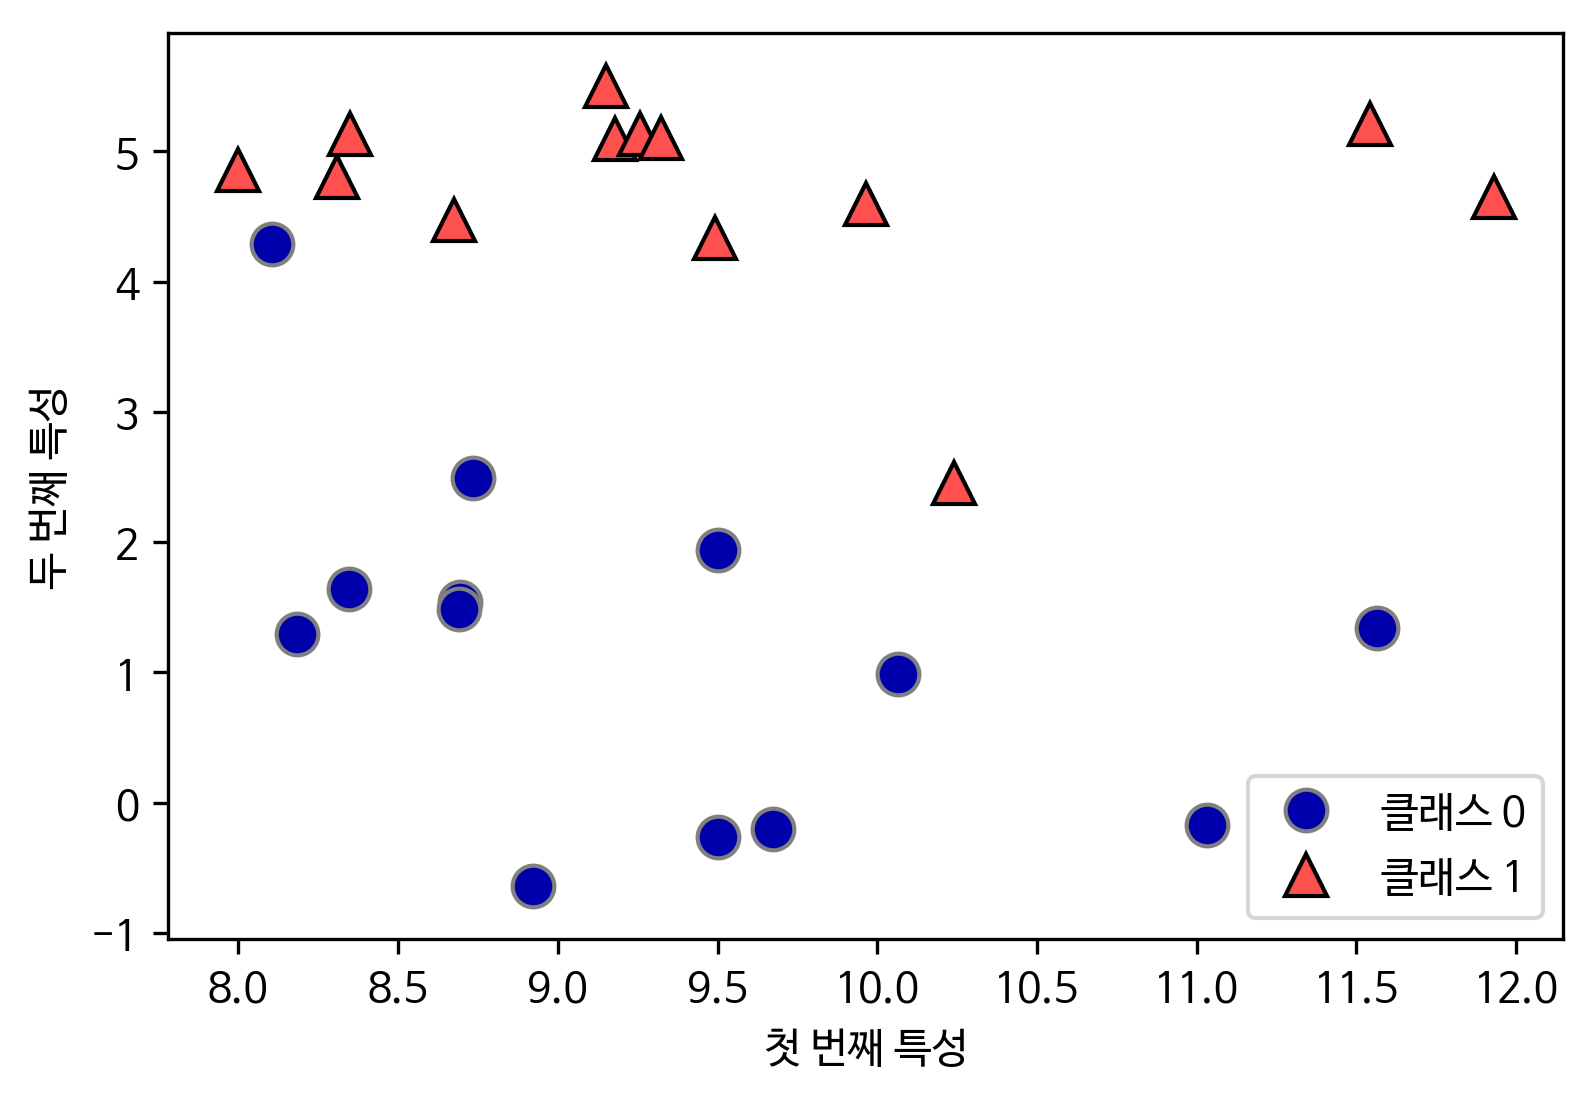

In [2]:
# # 그래프를 노트북 안에 그리기 위해 설정
# %matplotlib inline

# # 필요한 패키지와 라이브러리를 가져옴
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm

# # 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
# mpl.rcParams['axes.unicode_minus'] = False
# # matplotlib.rcParams[] : 전역 글꼴 설정
# # https://matplotlib.org/users/customizing.html
# # 나눔명조로 글꼴 바꾸기(전역)
# plt.rcParams["font.family"] = 'nanummyeongjo'

import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn

plt.rcParams['figure.dpi'] = 300
# 데이터셋을 만듭니다.
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape: {}".format(X.shape))
# 데이터 포인트 26개와 특성 2개

Text(0,0.5,'타깃')

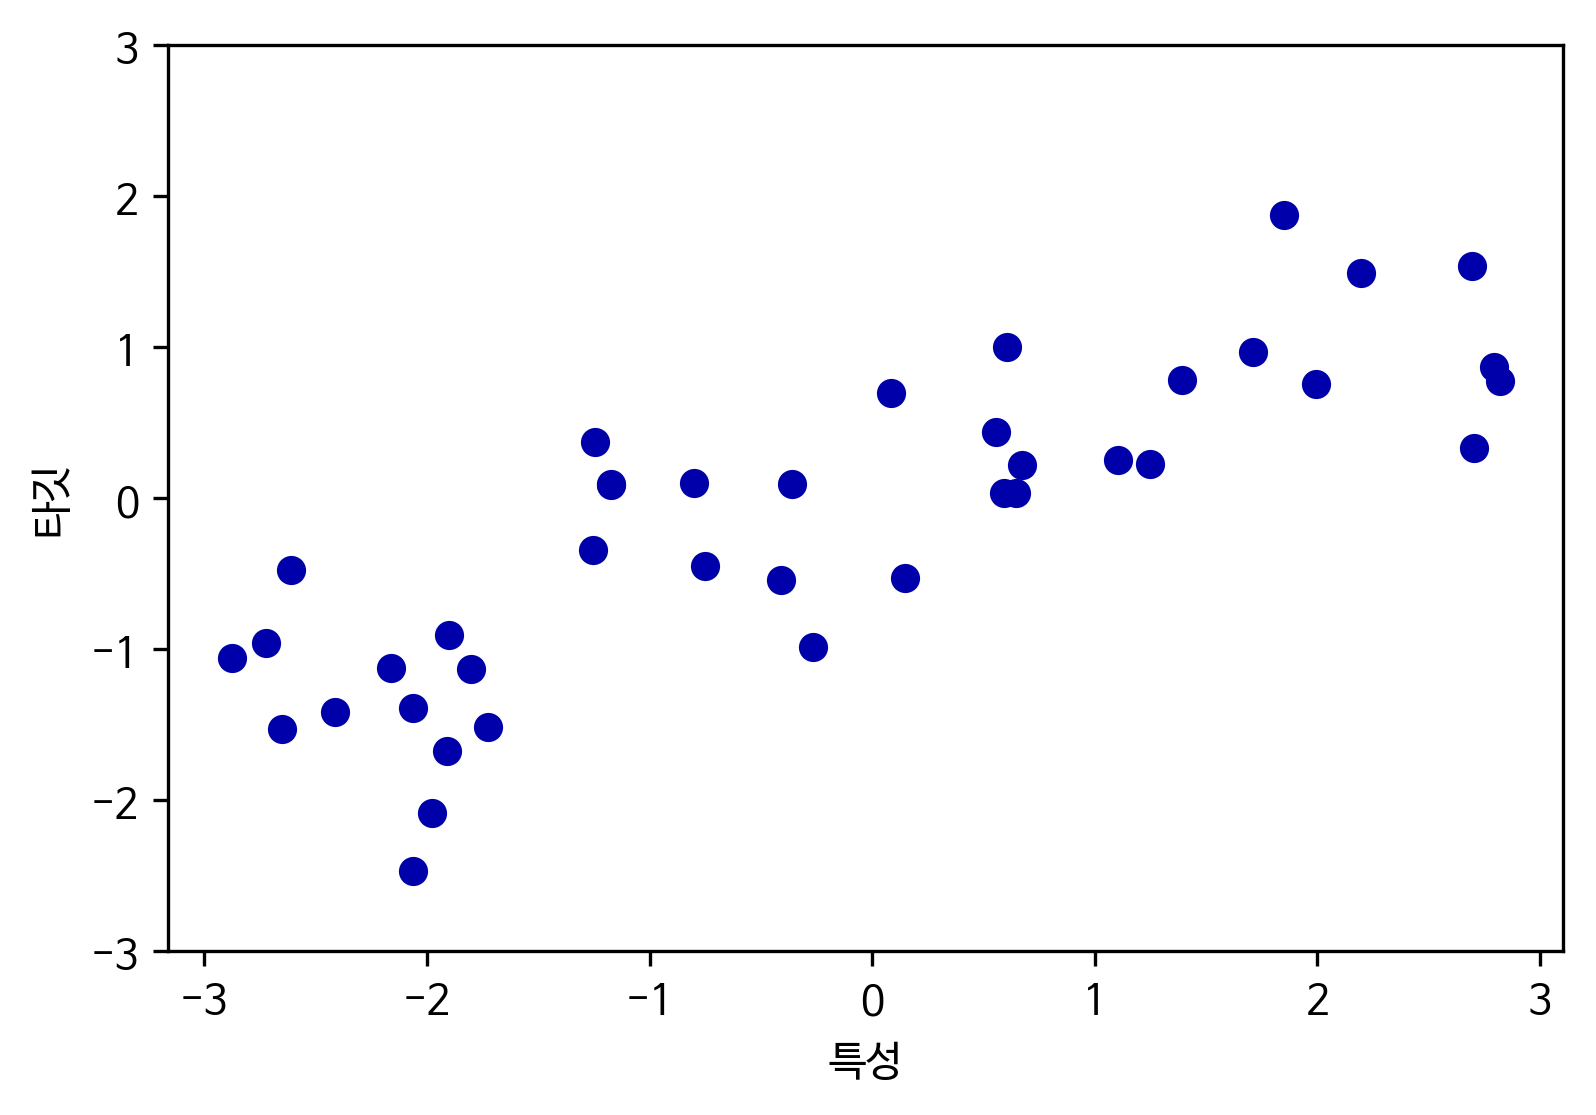

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [5]:
print("유방암 데이터의 형태: {}".format(cancer.data.shape))
# 569개의 데이터 포인트를 가지고 있고 특성은 30개입니다.

유방암 데이터의 형태: (569, 30)


In [6]:
print("클래스별 샘플 개수:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 개수:
{'malignant': 212, 'benign': 357}


In [7]:
#feature_names 속성을 확인하면 각 특성의 의미를 알 수 있습니다.
print("특성 이름:\n{}".format(cancer.feature_names))
#데이터에 관한 더 자세한 정보는 cancer.DESCR에서 확인

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: {}".format(boston.data.shape))
print("데이터의 형태: {}".format(boston.DESCR))
# 입력 특성뿐 아니라 특성끼리 곱하여(또는 상호작용) 의도적으로 확장됨
# 범죄율과 고속도로 접근성의 개별 특성은 물론, 범죄율과 고속도로 접근성의 곱도 특성으로 생각한다
# 특성을 유도해내는 것 : 특성 공학(feature engineering)

데이터의 형태: (506, 13)
데이터의 형태: Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-

In [9]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))
#extended version이 유도된 데이터셋

X.shape: (506, 104)


# K-최근접 이웃
## 가장 간단한 머신러닝 알고리즘
## 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부
## 새로운 데이터 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾는다

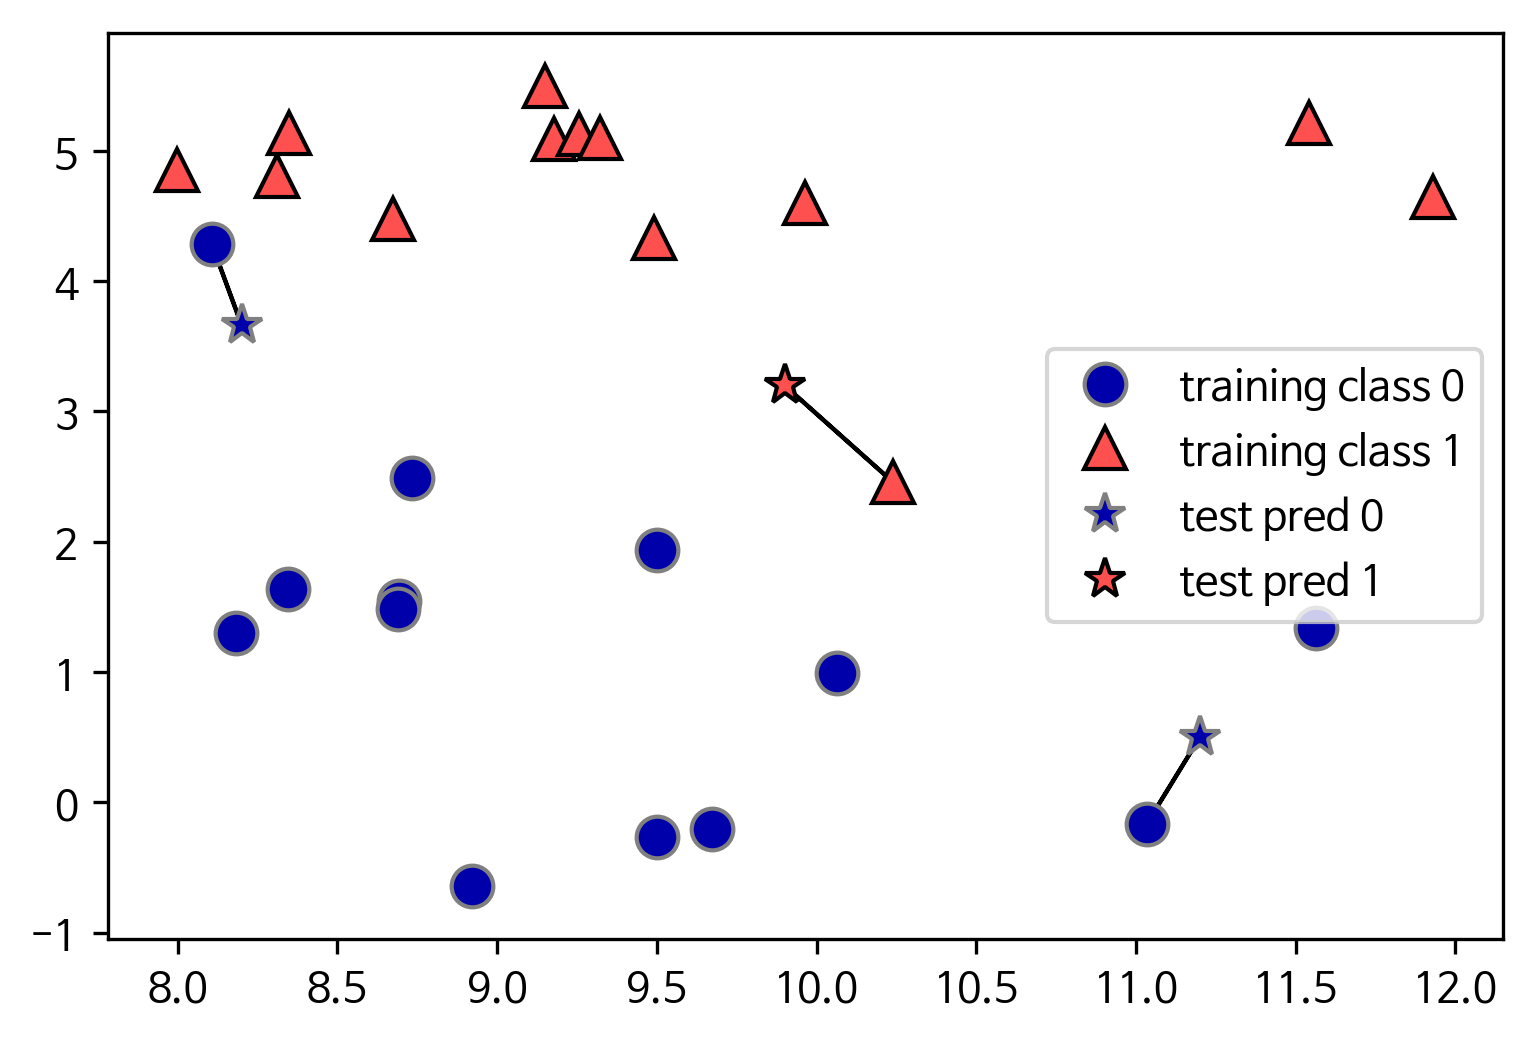

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
# 별 모양 데이터 3개를 추가하고 가장 가까운 훈련 데이터 포인트를 연결(데이터 포인트의 레이블)
# 가장 가까운 이웃 하나가 아니라 임의의 k개를 선택할 수도 있다
# 둘 이상의 이웃을 선택할 때는 레이블을 정하기 위해 투표
# -> 테스트 포인트 하나에 대해 k-최근접 이웃 중 다수의 클래스가 레이블이 됨


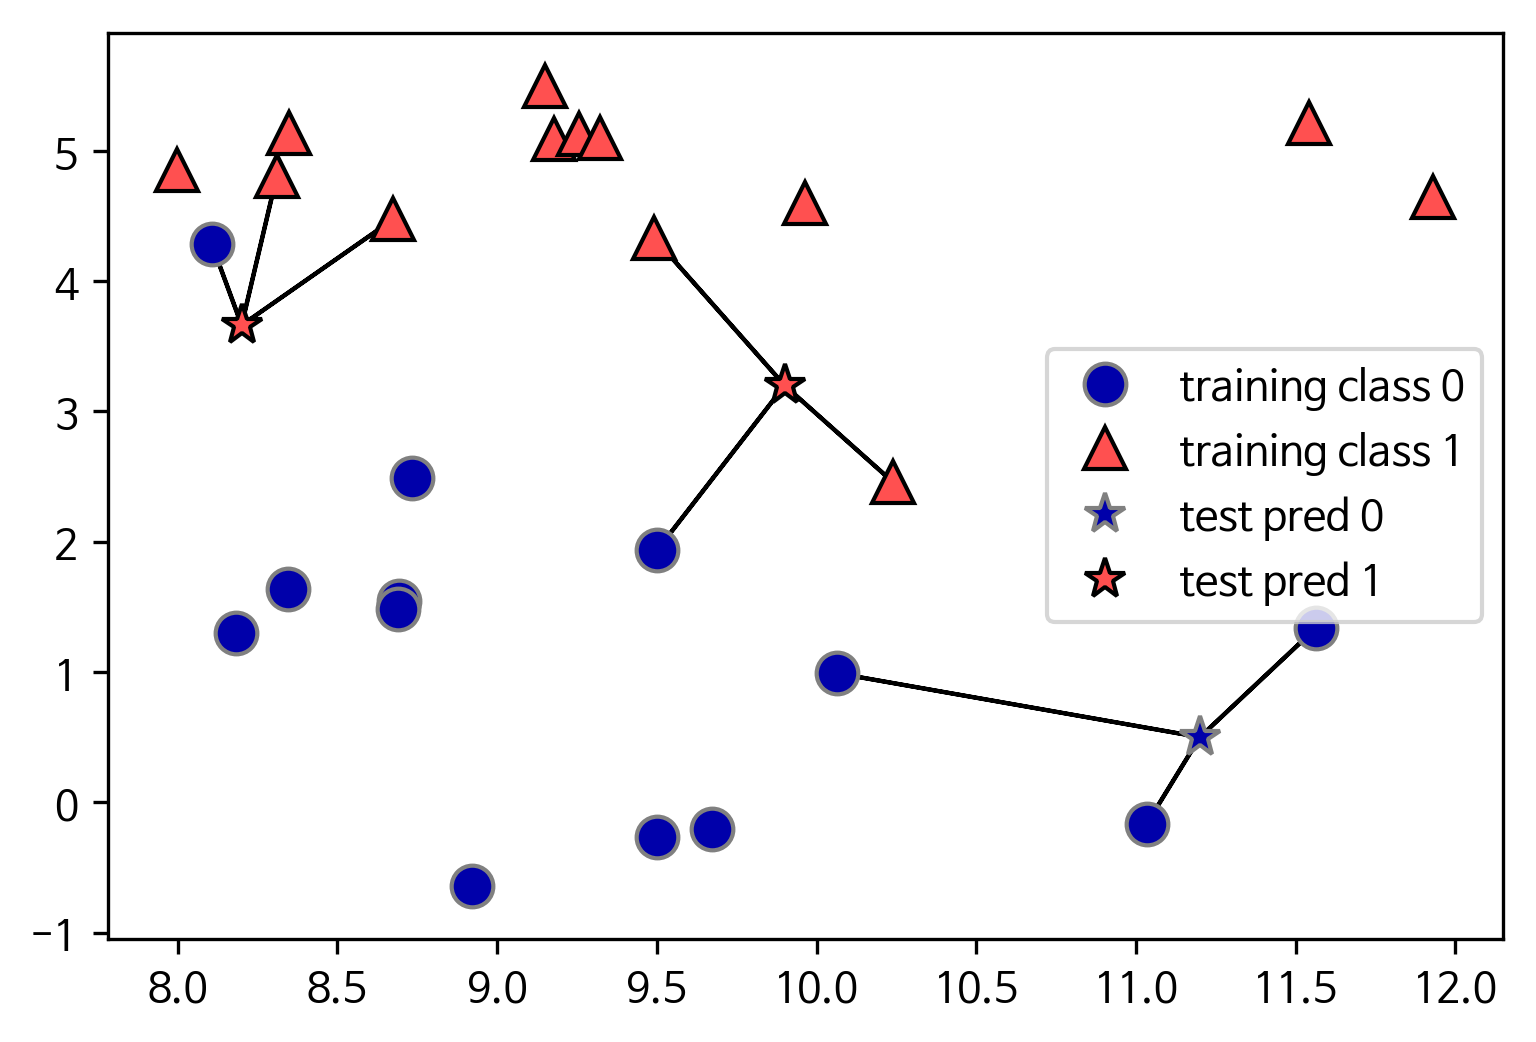

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))
# predict 메서드로 예측, 가장 가까운 이웃 계산 후 가장 많은 클래스 찾음

테스트 세트 예측: [1 0 1 0 1 0 0]


In [16]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))
# score 메서드에 테스트 데이터와 테스트 레이블을 넣어 모델이 얼마나 잘 일반화되었는지 평가

테스트 세트 정확도: 0.86


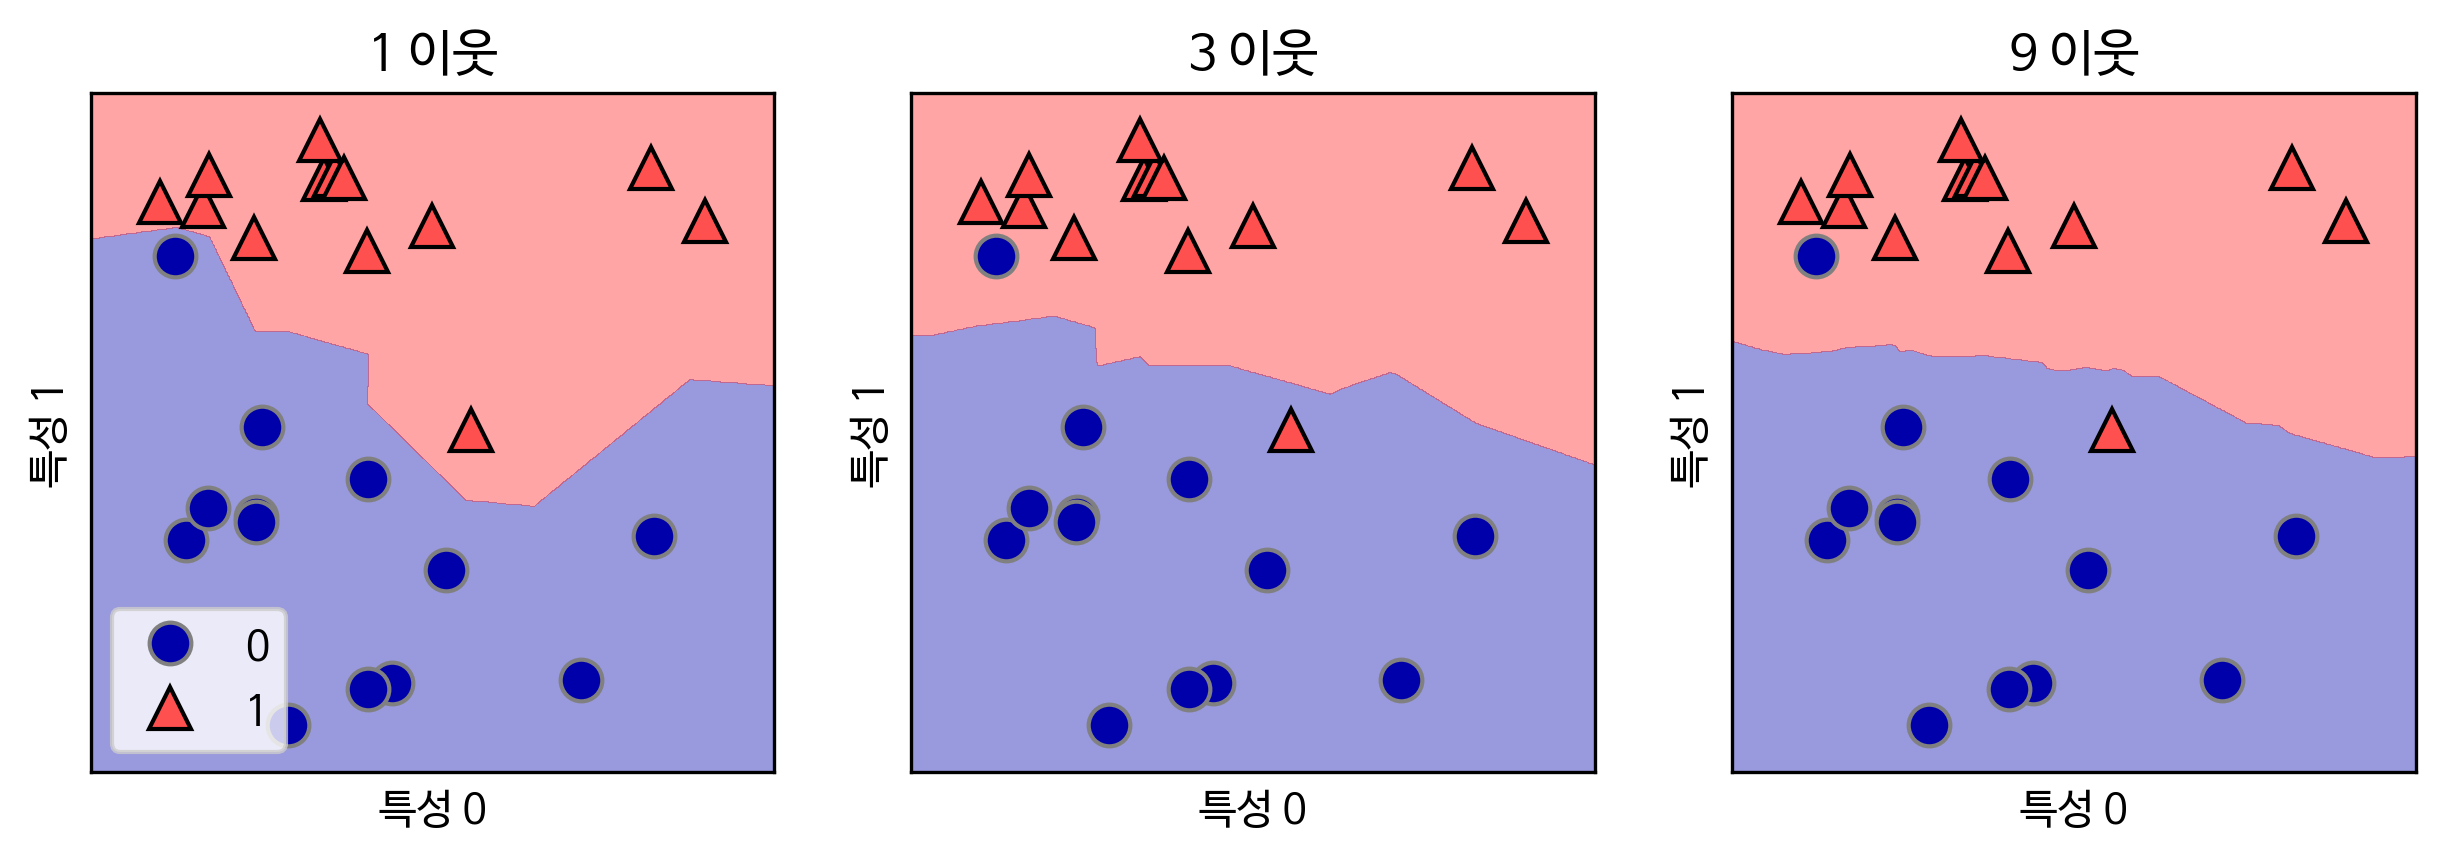

In [17]:
# KNeighborsClassifier 분석
# 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 결정 경계(decision boundary)
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    #fit 메서드는 self 객체를 반환합니다.
    #그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    axes[0].legend(loc=3)

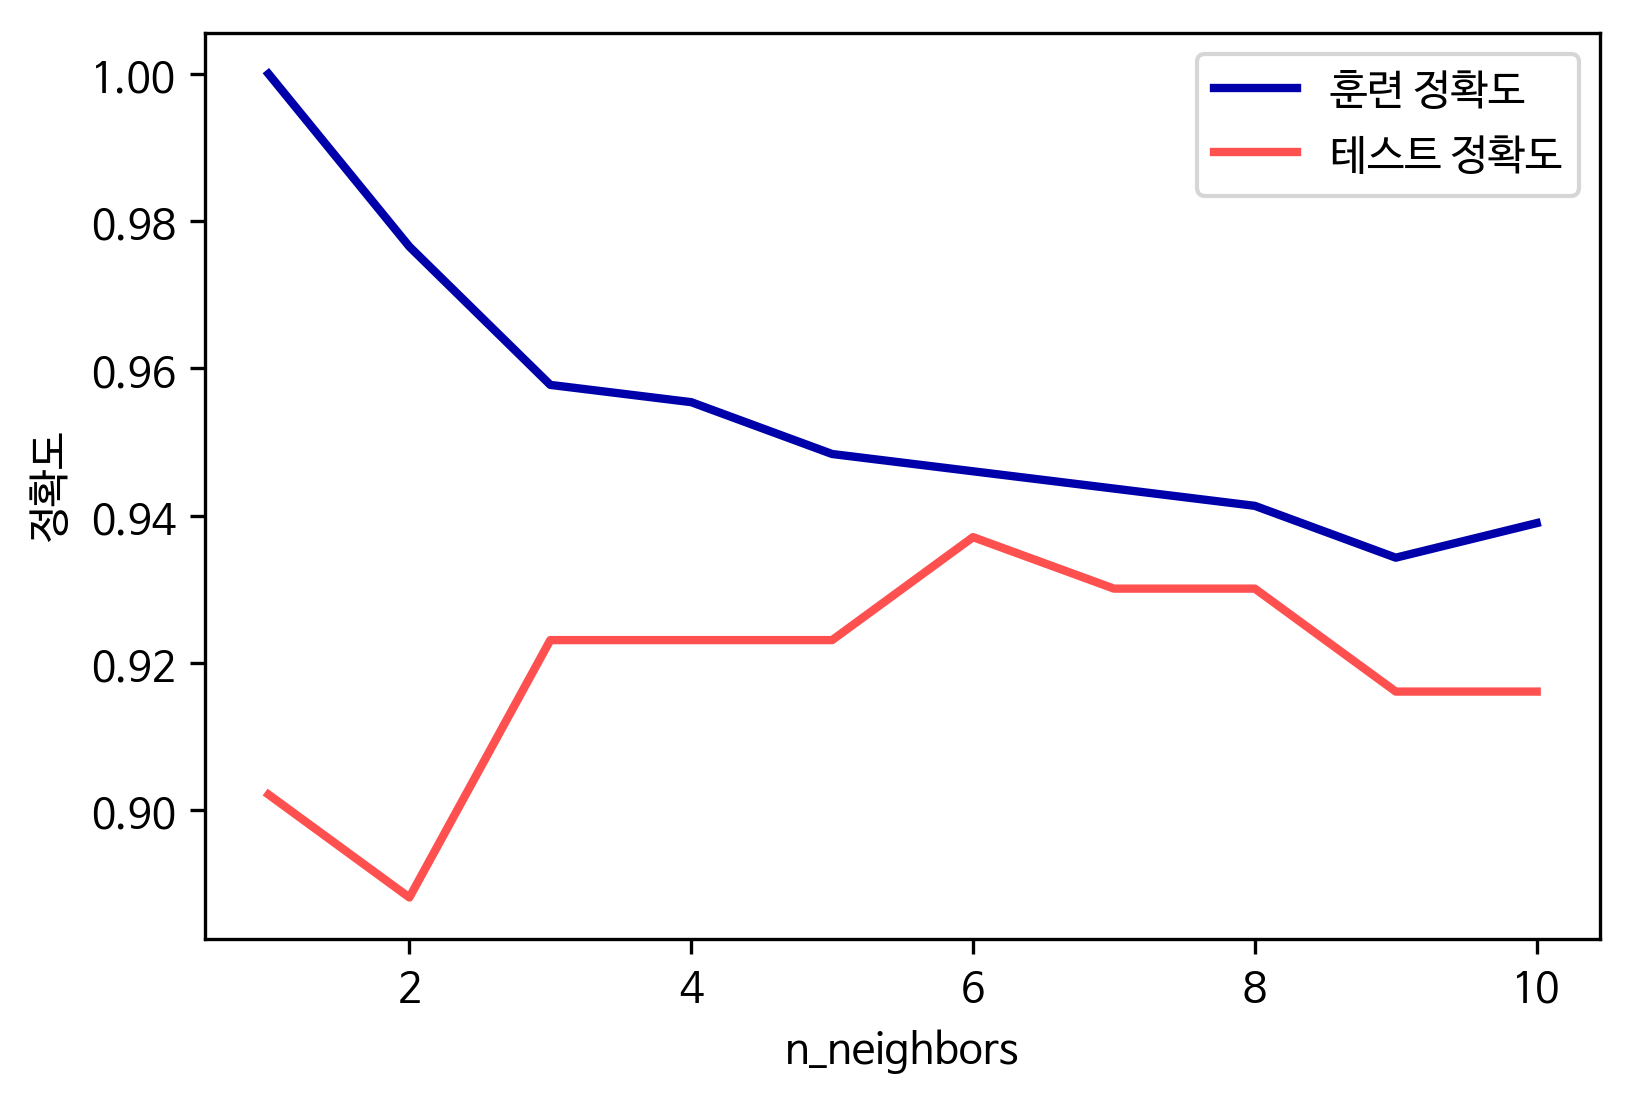

In [18]:
# 이웃의 수를 늘릴수록 결정 경계는 더 부드러워진다 -> 단순한 모델
# 이웃 적게 사용 -> 모델의 복잡도 높아짐. 이웃 많이 사용 -> 복잡도 낮아짐.

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

최근접 이웃의 수가 하나일 때 : 훈련 데이터에 대한 예측이 완벽
이웃의 수가 늘어나면 : 모델은 단순해짐, 훈련 데이터의 정확도 줄어듬
이웃 하나 사용 테스트 세트 정확도는 많이 사용했을 때보다 낮음 -> 1-최근접 이웃이 모델을 너무 복잡하게 만든다.
이웃 10개 사용 : 모델이 너무 단순해서 정확도는 더 나빠짐.

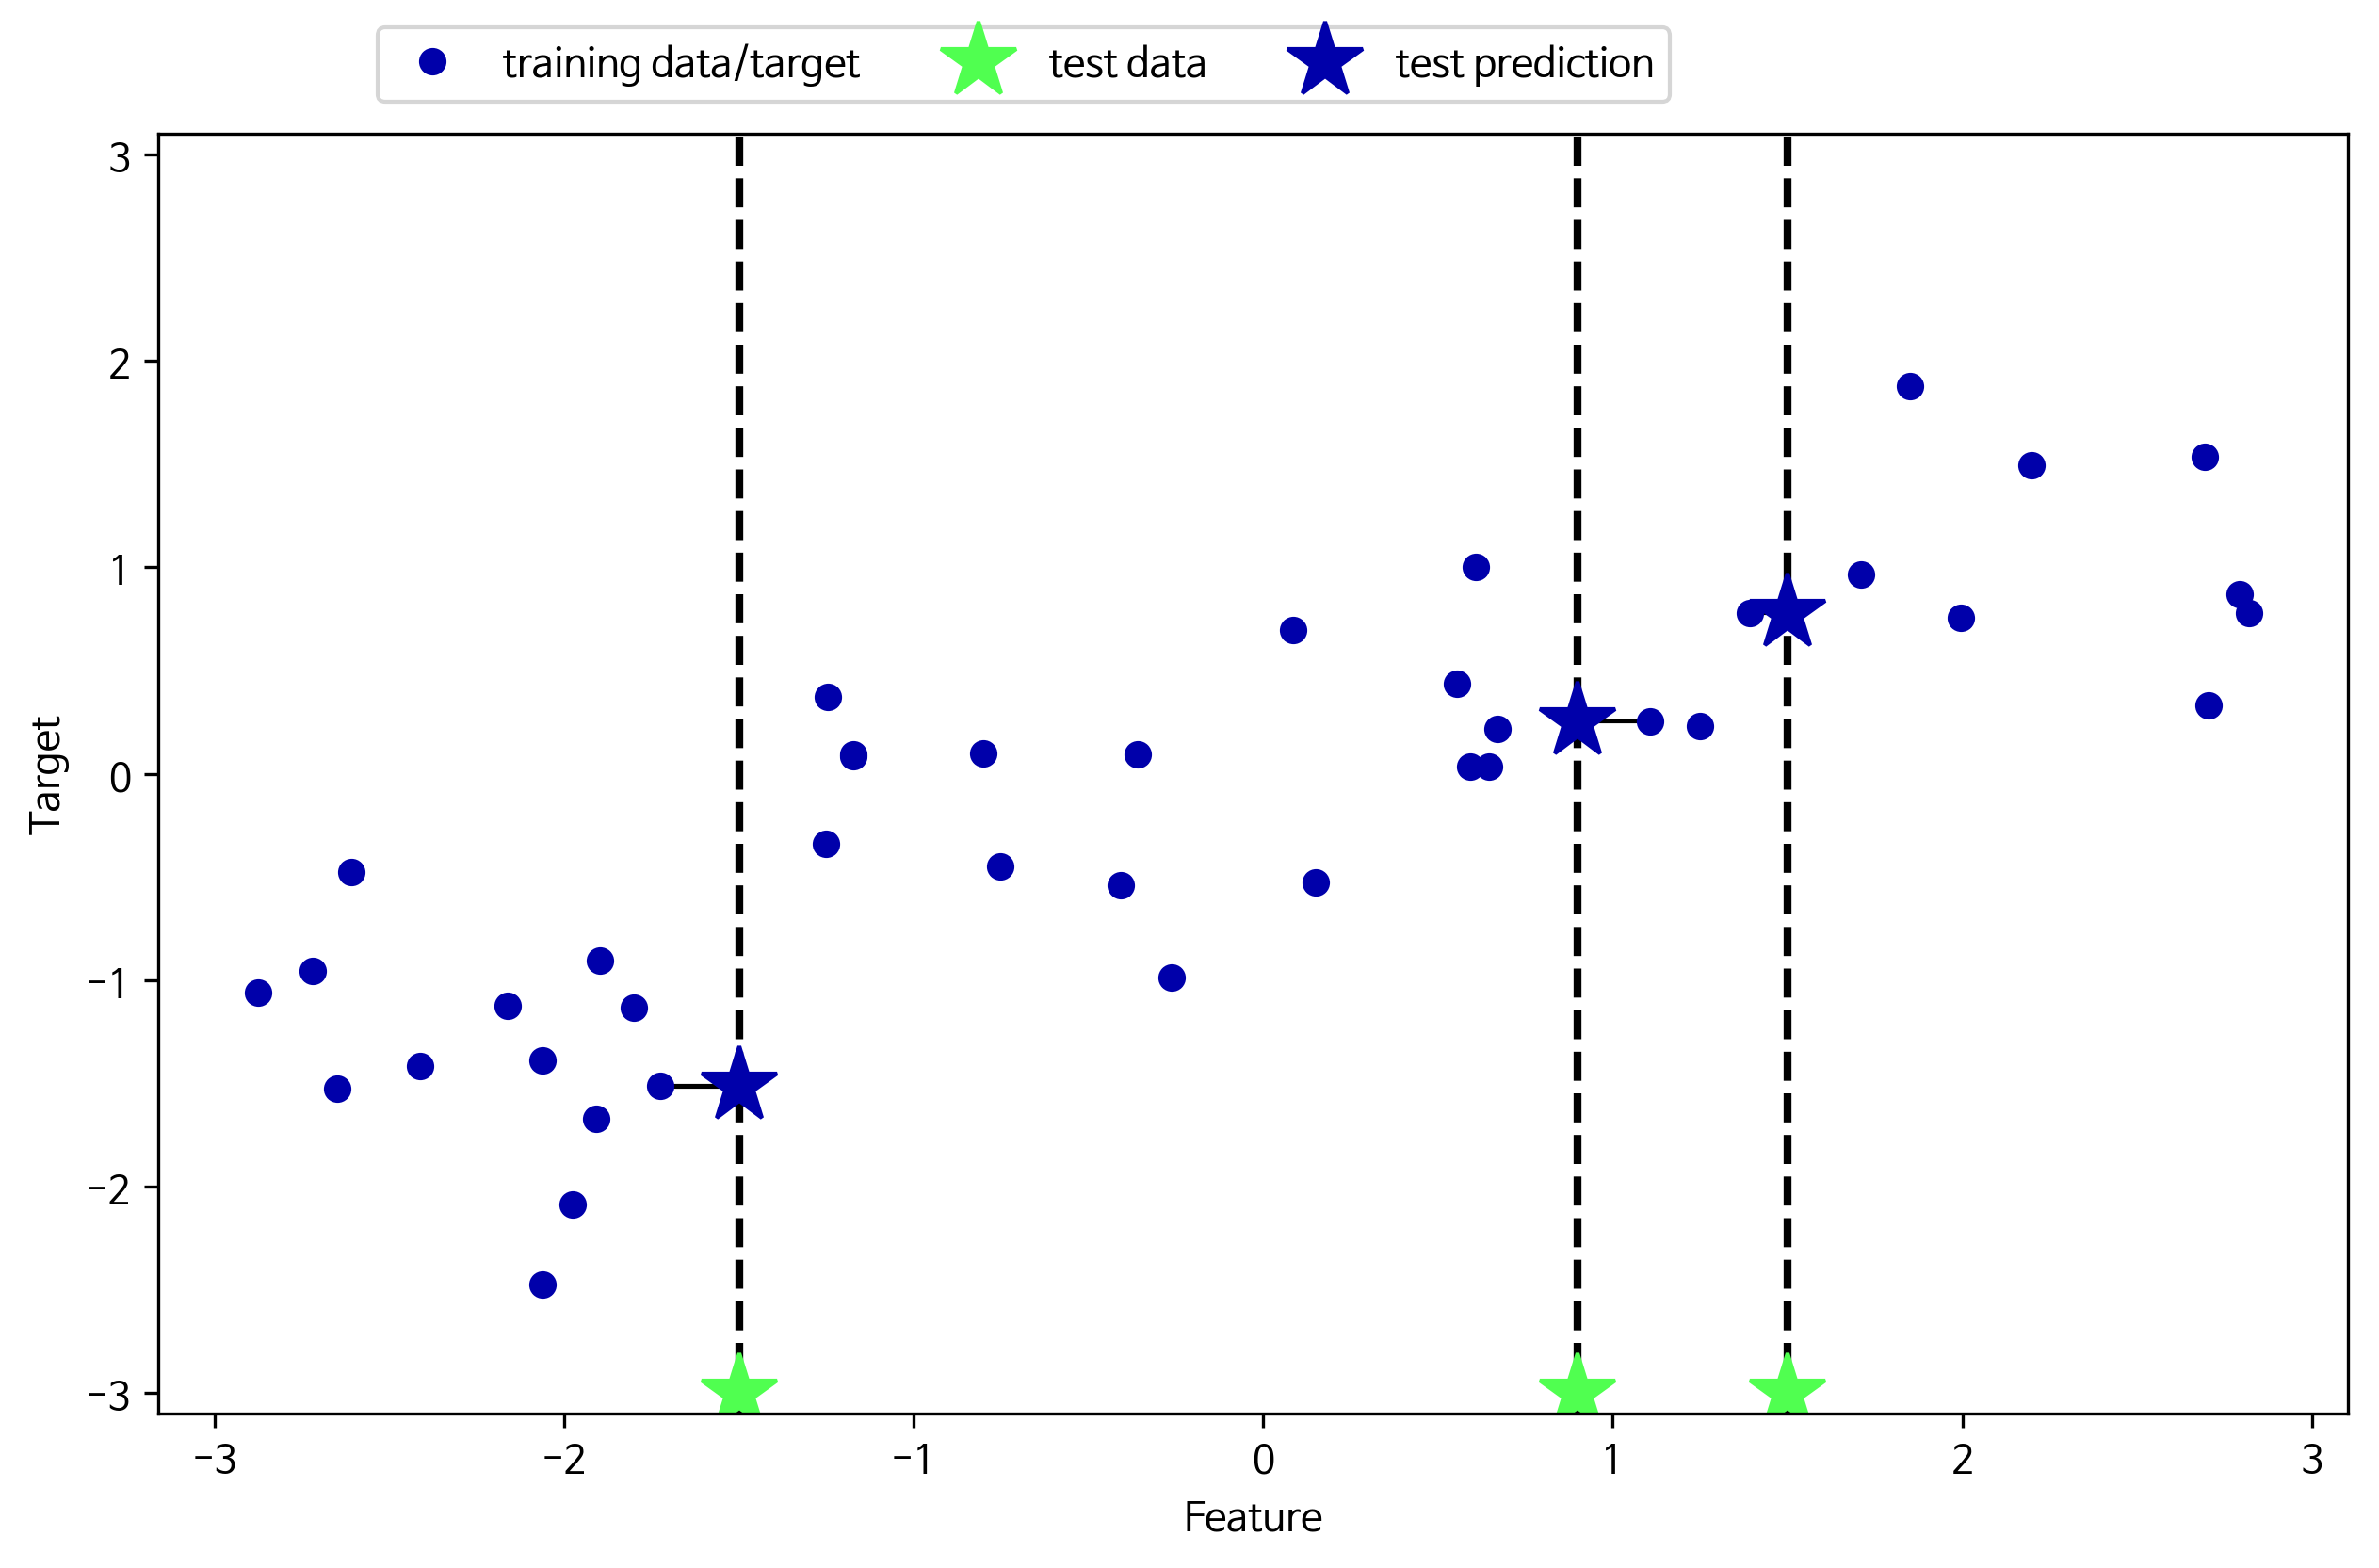

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

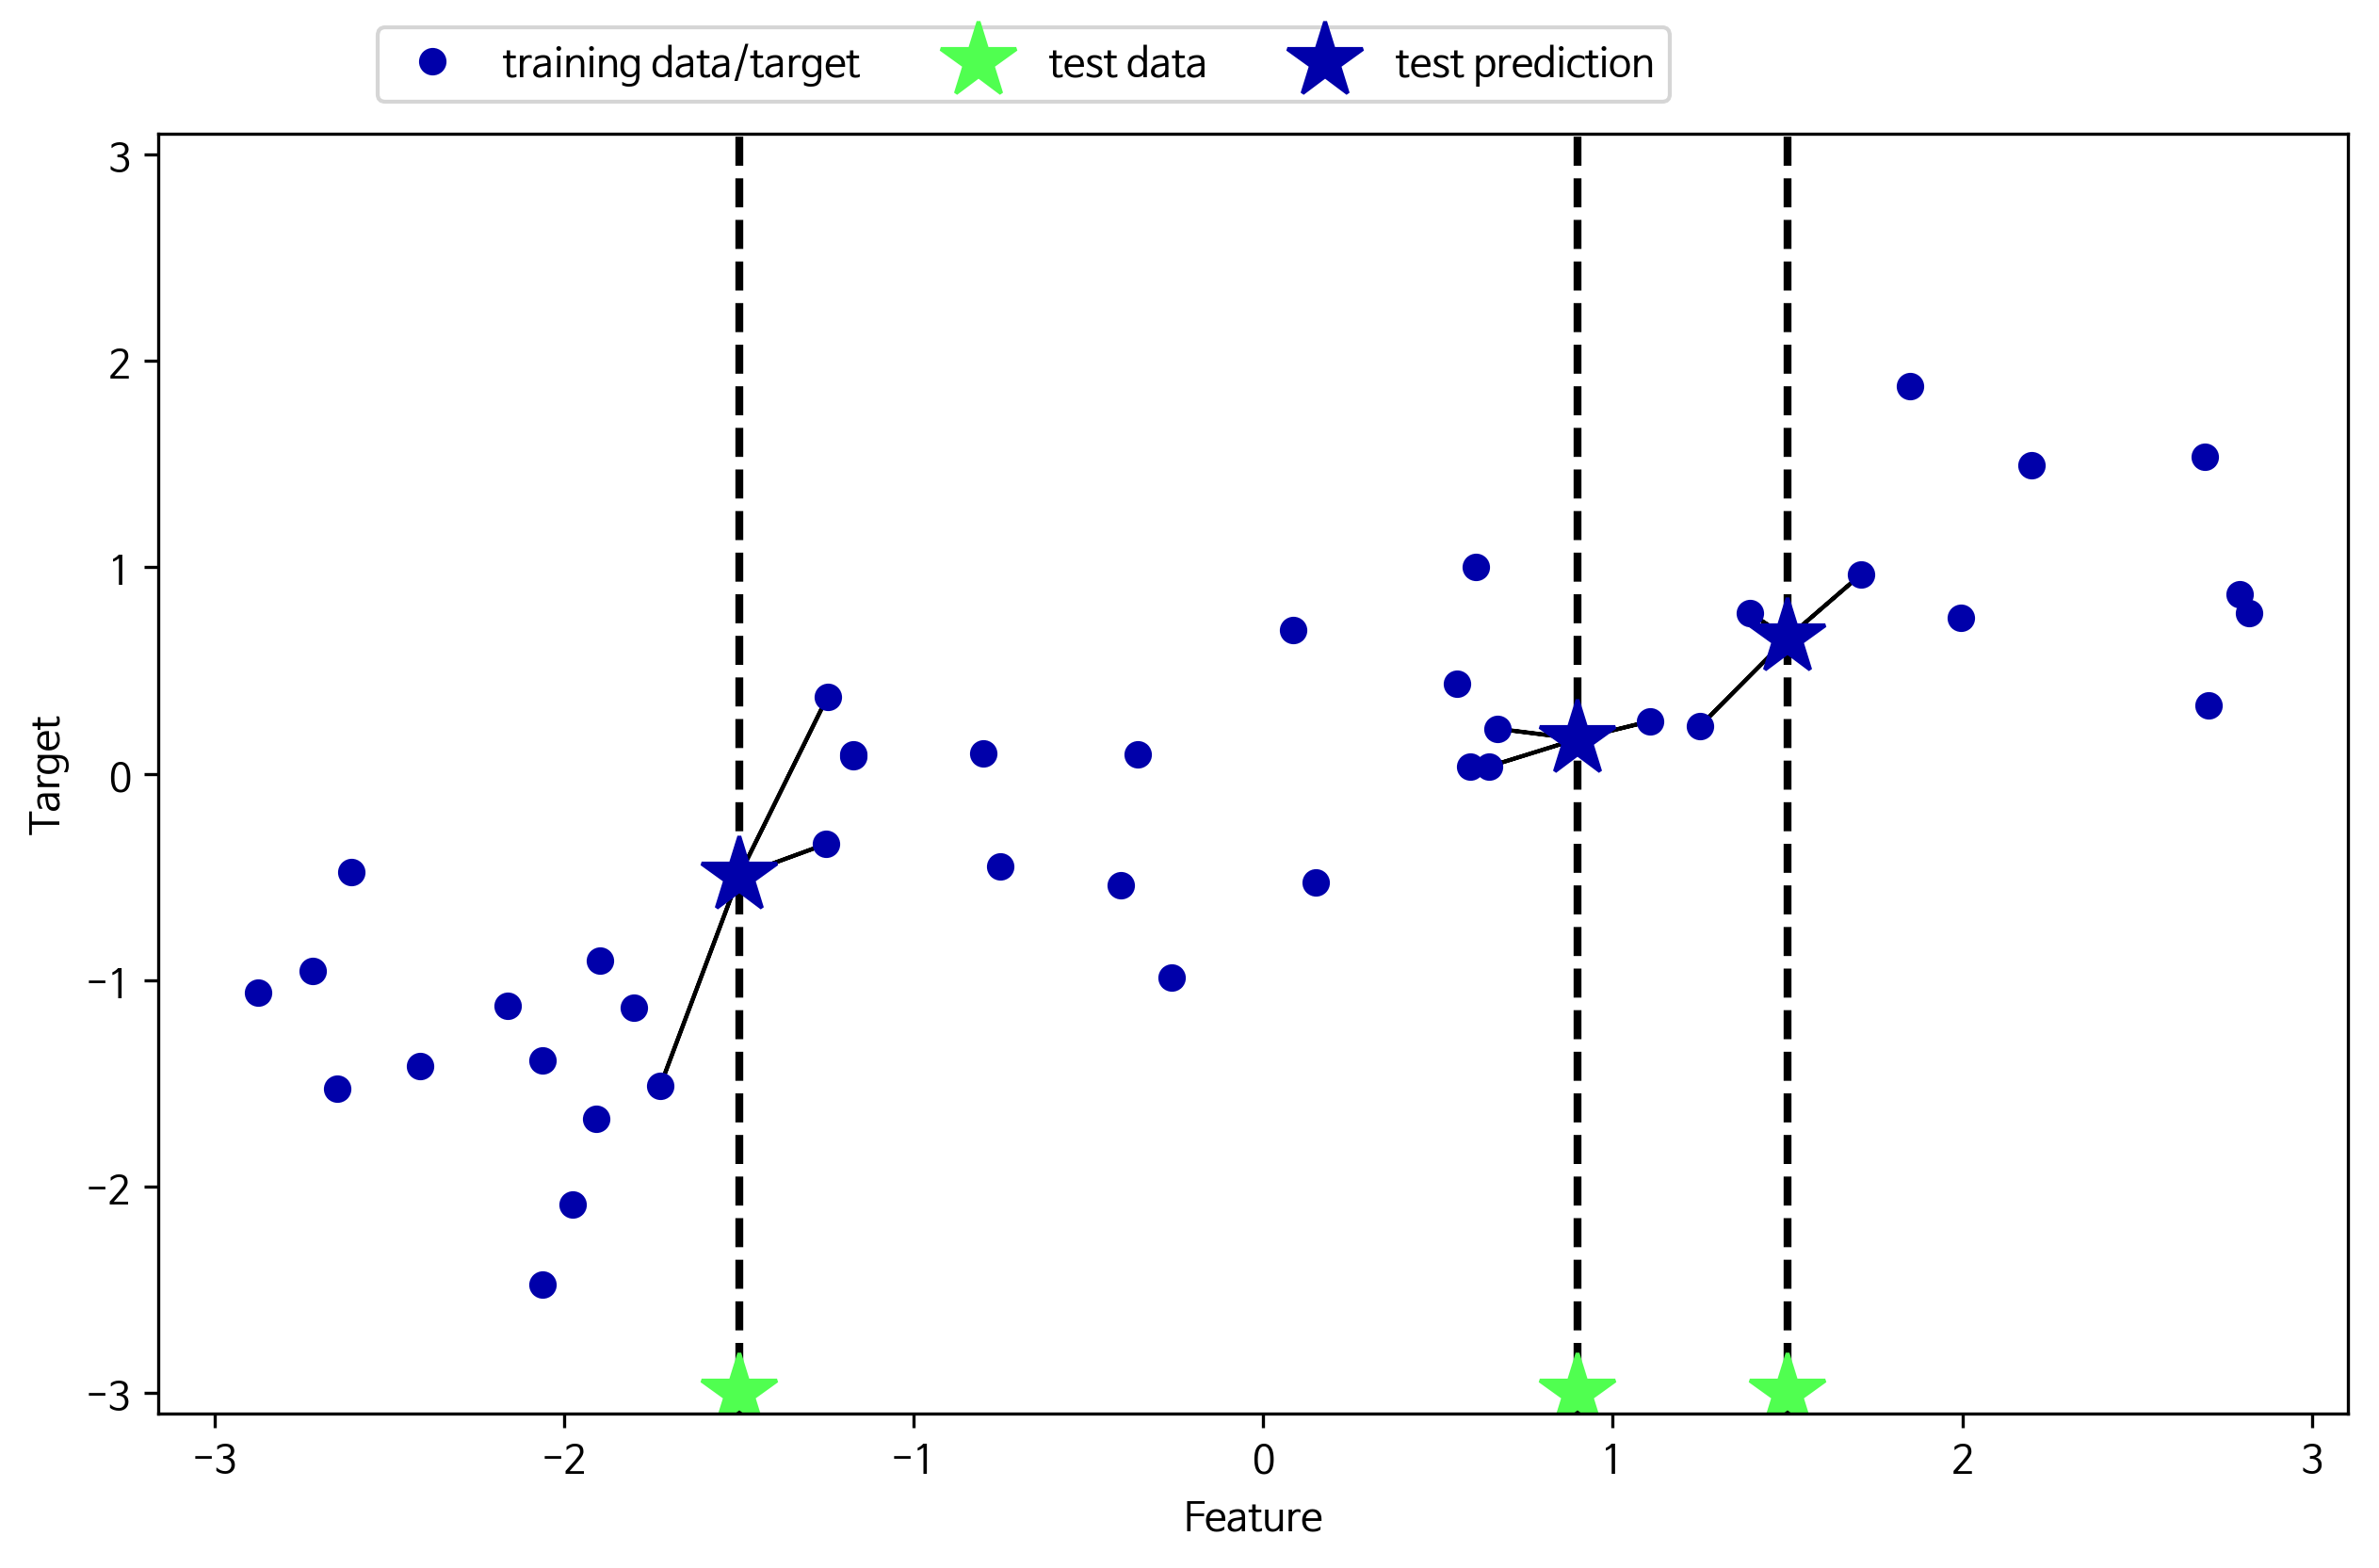

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
# 여러 개의 최근접 이웃을 사용할 땐 이웃 간의 평균이 예측됨

In [21]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만든다.
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킨다.
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [22]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [23]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))
# 결정 계수 R^2 : 회귀 모델에서 예측의 적합도를 0과 1사이의 값으로 계산
# 1은 예측이 완벽한 경우, 0은 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델

테스트 세트 R^2: 0.83


## KNeighborsRegressor 분석

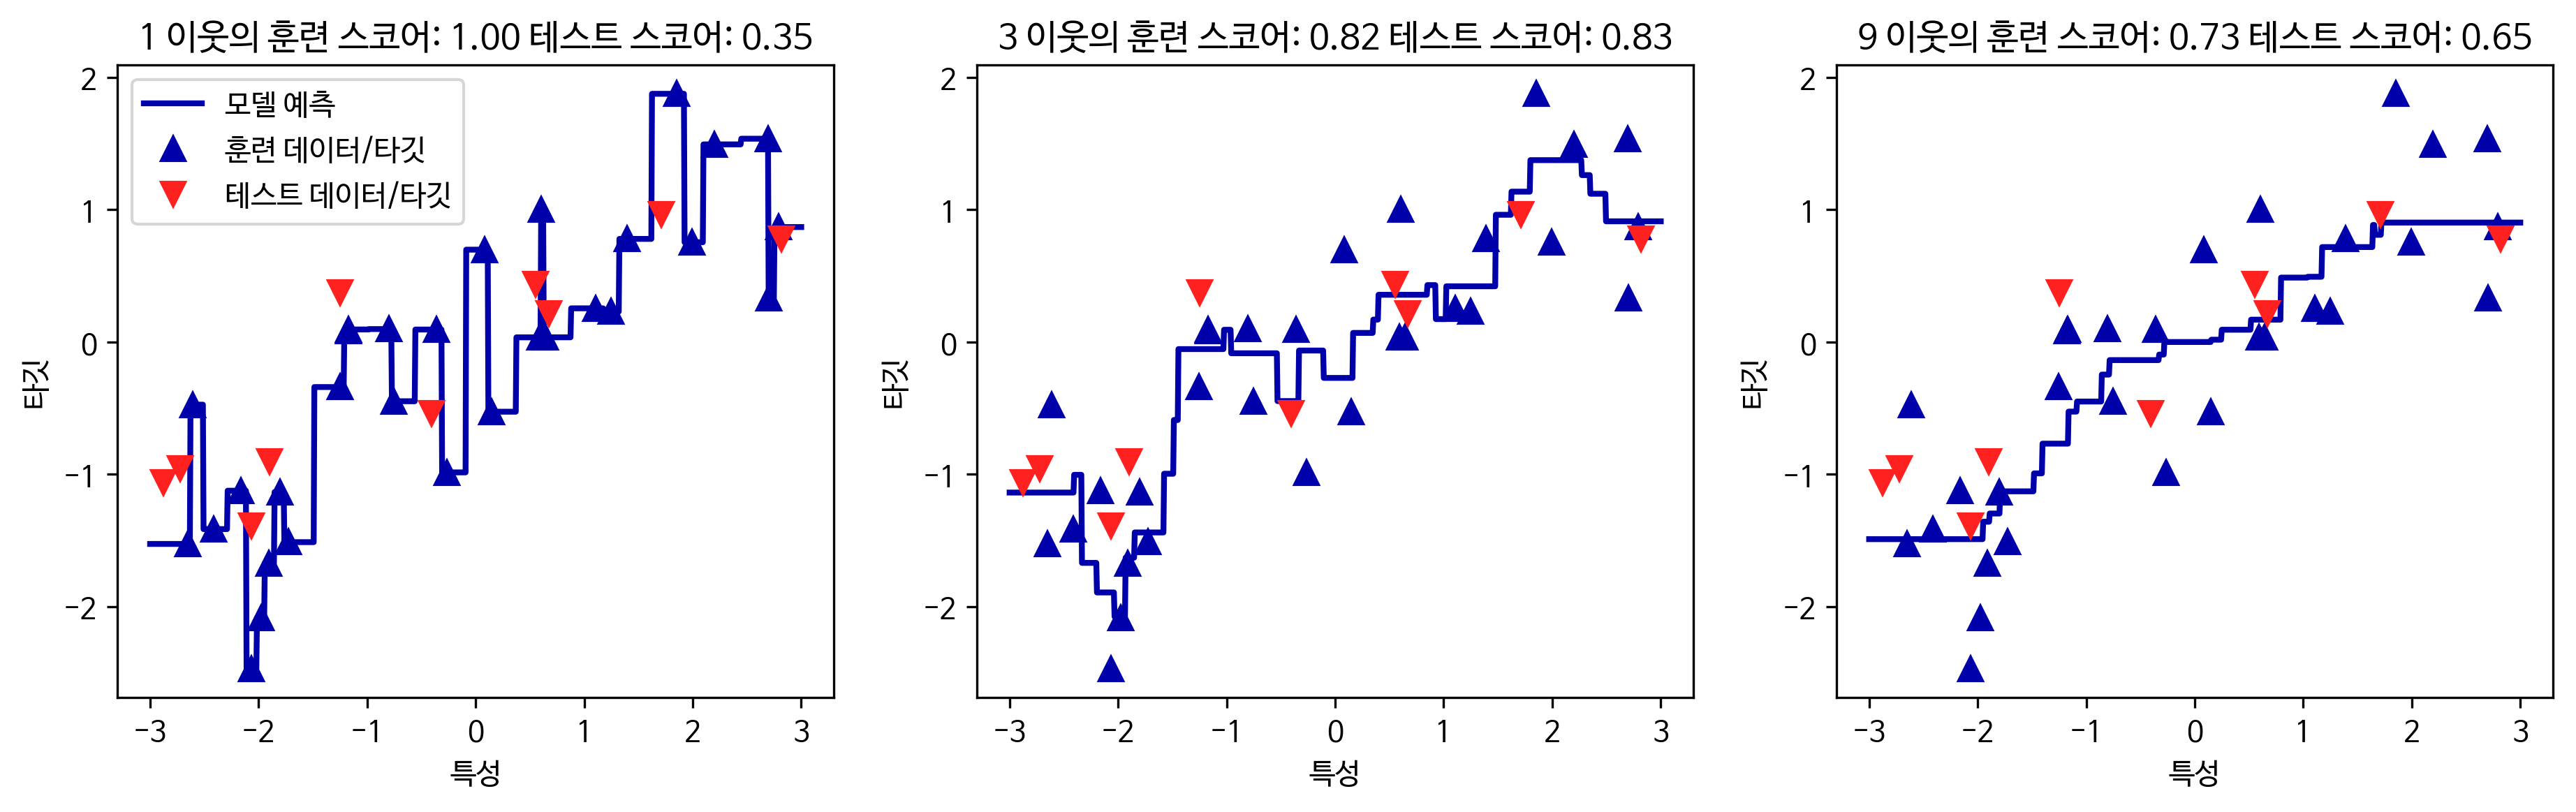

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3과 3 사이에 1,000개의 데이터 포인트를 만든다.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

# 이웃을 하나만 사용하면 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서
# 예측값이 훈련 데이터 포인트를 모두 지나감. -> 매우 불안정
# 이웃 많이 사용하면 훈련 데이터에는 안 맞을 수 있지만 더 안정된 예측

## KNeighbors 장단점과 매개변수
### 중요한 매개변수는 두 개
* 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수
* 이웃의 수 : 3개나 5개 정도가 좋지만 잘 조정해야
* 거리 재는 방법은 주로 유클리디안 거리 방식 사용

### K-NN의 장점
* 이해하기 매우 쉬움
* 많이 조정하지 않아도 좋은 성능
* -> 더 복잡한 알고리즘 적용 전 좋은 try 시작점
* 매우 빠르게 만들 수 있지만 훈련 세트가 매우 크면 (특성의 수나 샘플의 수가 클 경우) 예측이 느려짐
* K-NN 알고리즘을 사용할 땐 데이터 전처리 과정이 중요
* -> 이웃 간 거리 계산 시 특성마다 값의 범위가 다르면 범위가 작은 특성에 크게 영향 받음
* -> 따라서 특성들이 같은 스케일을 갖도록 정규화 하는 것이 일반적
* (수백 개 이상의) 많은 특성을 가진 데이터셋에는 잘 동작X
* 특성 값 대부분이 0인 (즉 희소한) 데이터셋과는 특히 잘 작동X
* 예측이 느리고 많은 특성 처리 능력이 부족 -> 현업에선 잘 안씀 --> 이런 단점 없는 선형 모델

# 선형 모델
### 선형 모델은 입력 특성에 대한 선형 함수를 만들어 예측 수행

# 머신러닝에서 알고리즘이 주어진 데이터로부터 학습하는 파라미터 : 모델 파라미터, 파라미터, 계수
# 모델이 학습할 수 없어서 사람이 직접 설정해 주어야 하는 파라미터 : 하이퍼파라미터, 매개변수

### 특성이 많아지면 w는 각 특성에 해당하는 기울이를 모두 가짐.
### 예측값은 입력 특성에 w의 각 가중치(음수일수도)를 곱해서 더한 가중치 합

w[0]: 0.393906  b: -0.031804


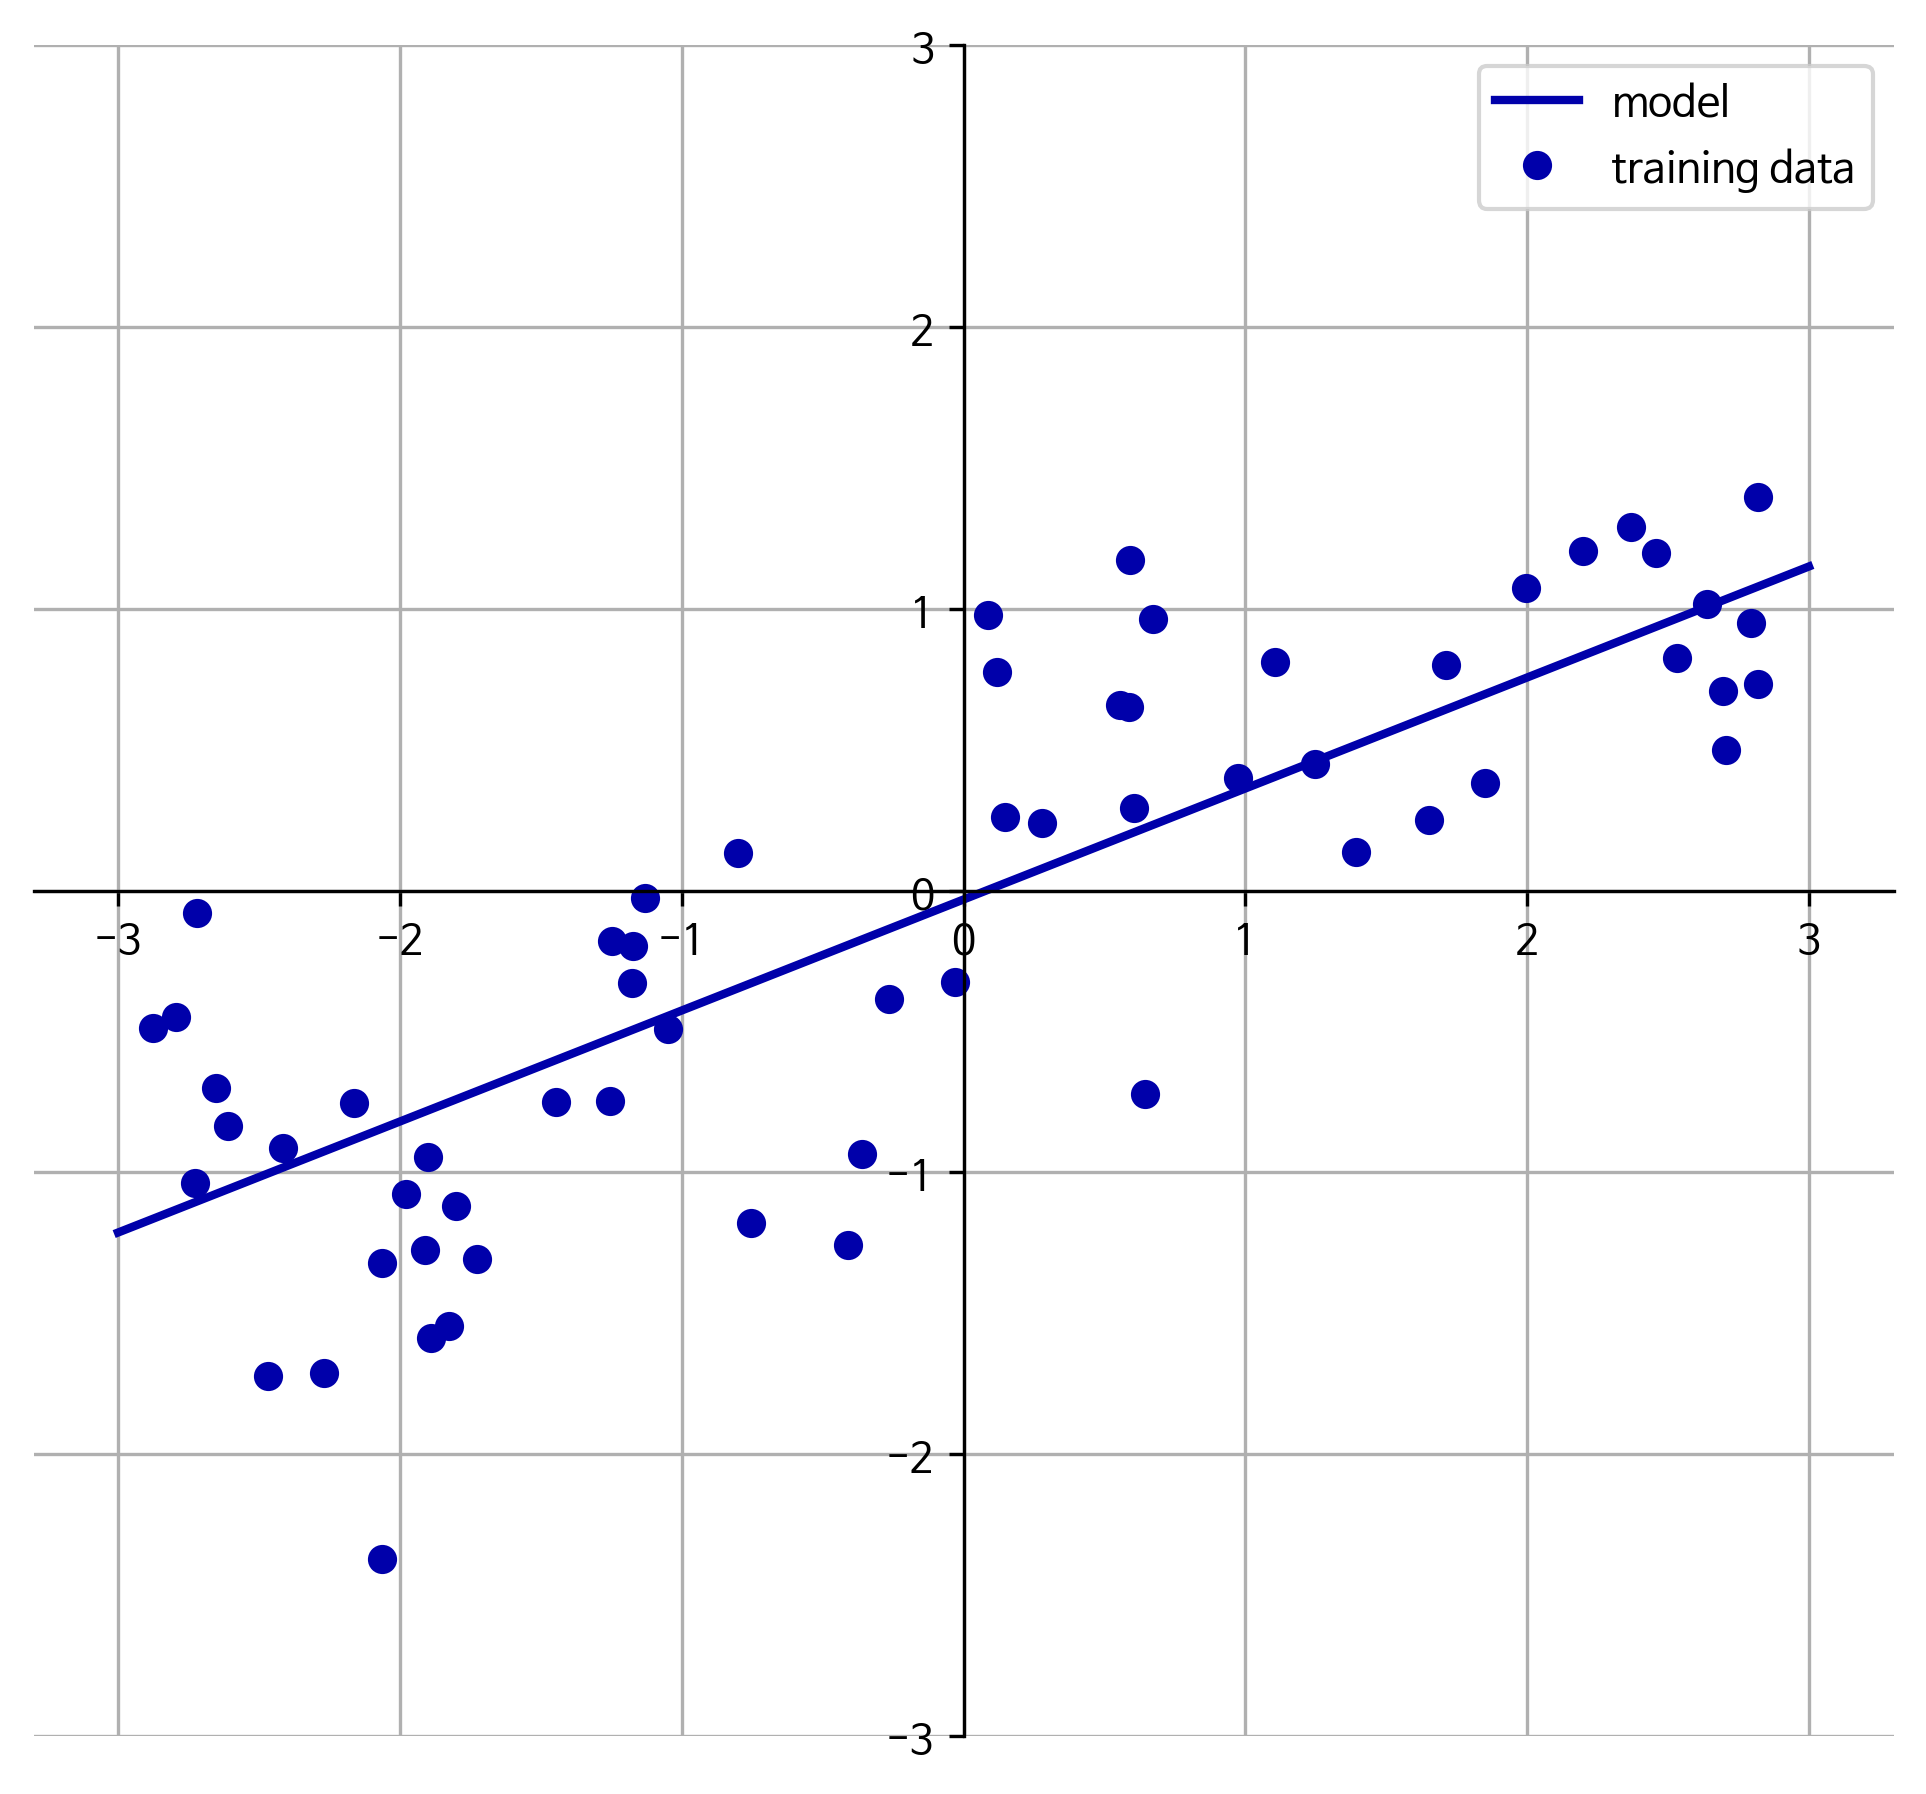

In [25]:
mglearn.plots.plot_linear_regression_wave()

## 특성 1개 : 직선
## 특성 2개 : 평면
## 특성 여러개 : 초평면

## 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃 y도 완벽하게 (훈련 세트에 대해서) 선형 함수로 모델링할 수 있다.

# 선형 회귀(최소제곱법)

## 가장 간단하고 오래된 회귀용 선형 알고리즘
## 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차(mean squared error)를 최소화하는 파라미터 w와 b를 찾는다. : 예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눔.
## 매개변수가 없는 것이 장점, 그래서 모델의 복잡도를 제어할 수 없다.

In [26]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [27]:
# 기울기 파라미터(w)는 가중치(weight) 또는 계수(coefficient), lr 객체의 coef_ 속성에 저장
# 편향(offset) 또는 절편(intercept) 파라미터(b)는 intercept_ 속성에 저장

print("lr.coef_ : {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
# scikit-learn은 훈련 데이터에서 유도된 속성은 항상 끝에 밑줄을 붙인다(매개변수와 구분)

lr.coef_ : [0.394]
lr.intercept_: -0.031804343026759746


In [28]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

# 훈련 세트와 테스트 세트 점수가 매우 비슷 -> 과소적합
# 1차원 데이터셋에서는 모델이 매우 단순(혹은 제한) 과대적합 걱정필요 X
# 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져 과대적합될 가능성 높다

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [29]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [30]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

# 훈련 데이터와 테스트 데이터 사이의 성능 차이 : 과대 적합 -> 복잡도를 제어할 수 있는 모델 사용해야

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


# 릿지 회귀
## 기본 선형 회귀 방식 대신 가장 널리 쓰임
## 릿지(Ridge)도 회귀를 위한 선형 모델. -> 최소적합법에서 사용한 것과 같은 예측 함수를 사용
## 하지만 릿지 회귀에서의 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있음 -> 가중치의 절댓값을 가능한 한 작게 만듦
## -> 다시 말해서 w의 모든 원소가 0에 가깝게 되길 원함
## 모든 특성이 출력에 주는 영향을 최소한으로 만든다 (기울기를 작게) -> 규제
## 규제(regularization) : 과대적합이 되지 않도록 모델을 강제로 제한 (릿지 회귀에는 L2 규제)

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [32]:
# 과대적합은 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 일어납니다.
# Ridge의 객체를 만들때 매개변수 지정안하면 alpha = 1.0
# Ridge는 모델을 단순하게 (계수를 0에 가깝게) 해주고 훈련 세트에 대한 성능 사이를 절충할 수 있게 해줌. (alpha로)
# 최적alpha값 : 데이터셋에 달림
# 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

# 아주 작은 alpha값은 계수를 거의 제한하지 않으므로 LinearRegression으로 만든 모델과 거의 같아짐.

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [33]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

# 더 나아짐. alpha값에 따라 모델의 coef_ 속성이 어떻게 달라지는지 조사하면 alpha 매개변수가
# 모델을 어떻게 변경시키는지 더 깊게 이해할 수 있음.
# 높은 alpha 값은 제약이 더 많으므로 작은 alpha값일 때보다 coef_의 절댓값 크기가 작을 것이라  예상.

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


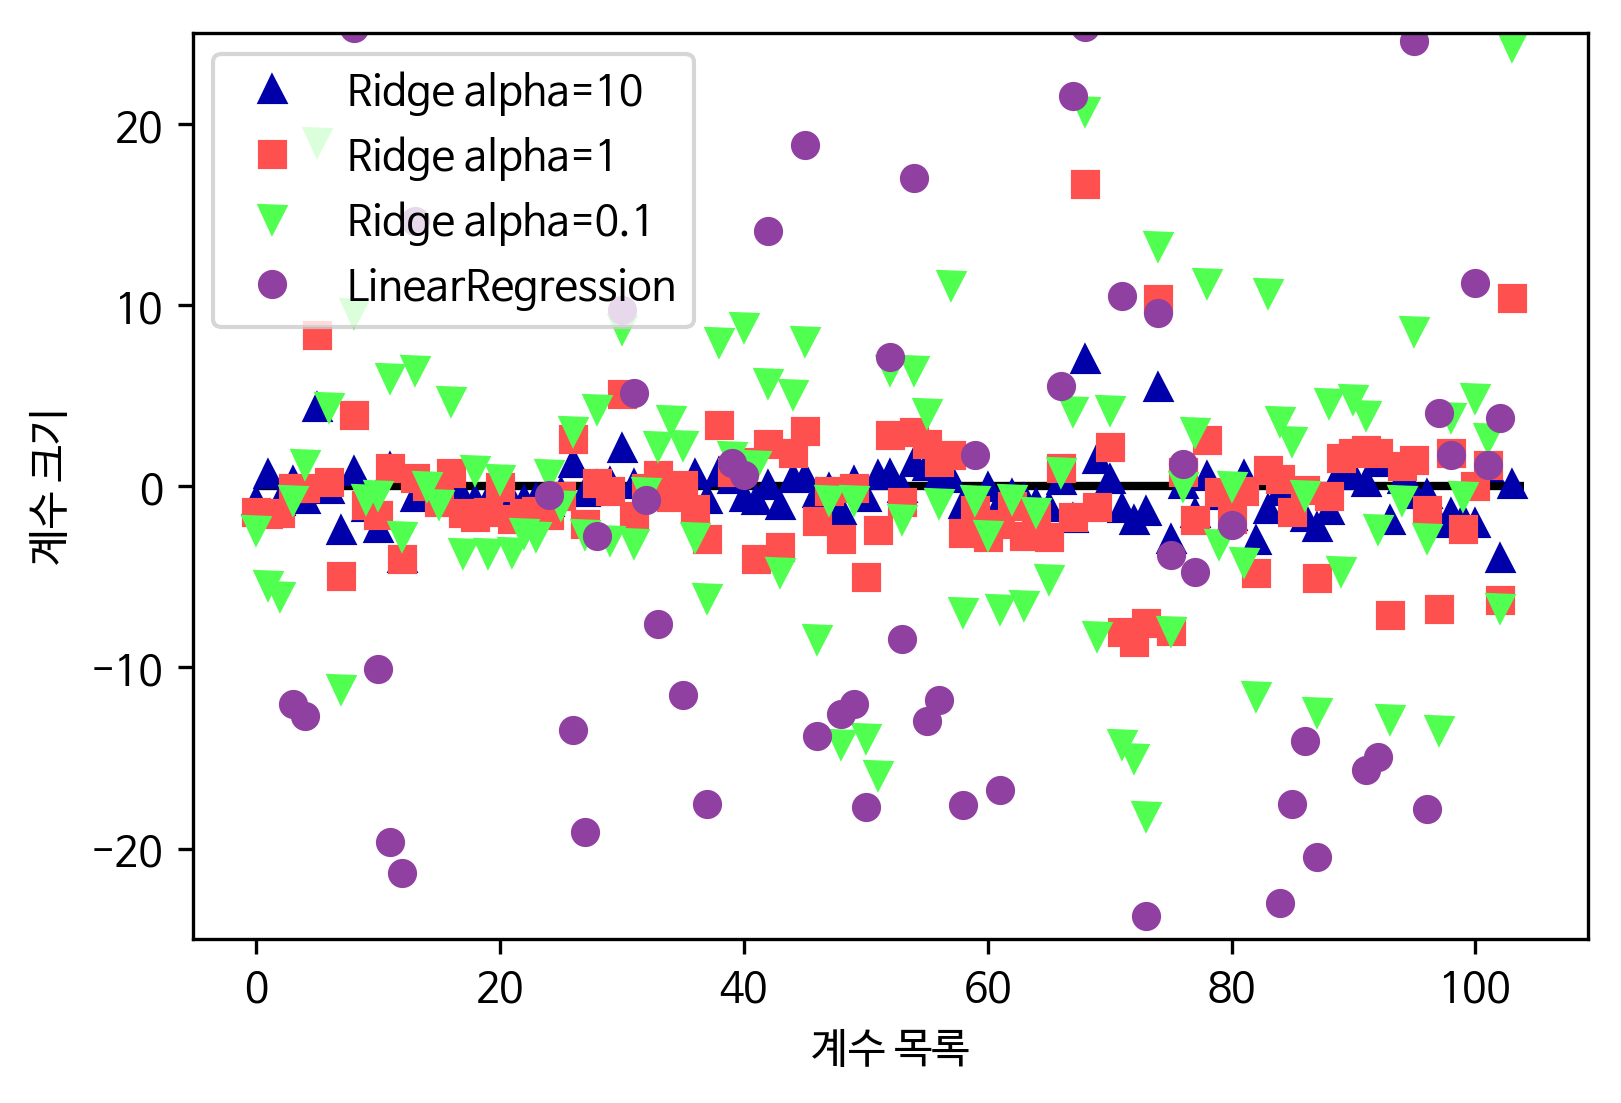

In [34]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

# x 축은 coef_의 원소를 위치대로 나열.
# y 축은 각 계수의 수치

# alpha가 작을 수록 계수가 커지는 경향

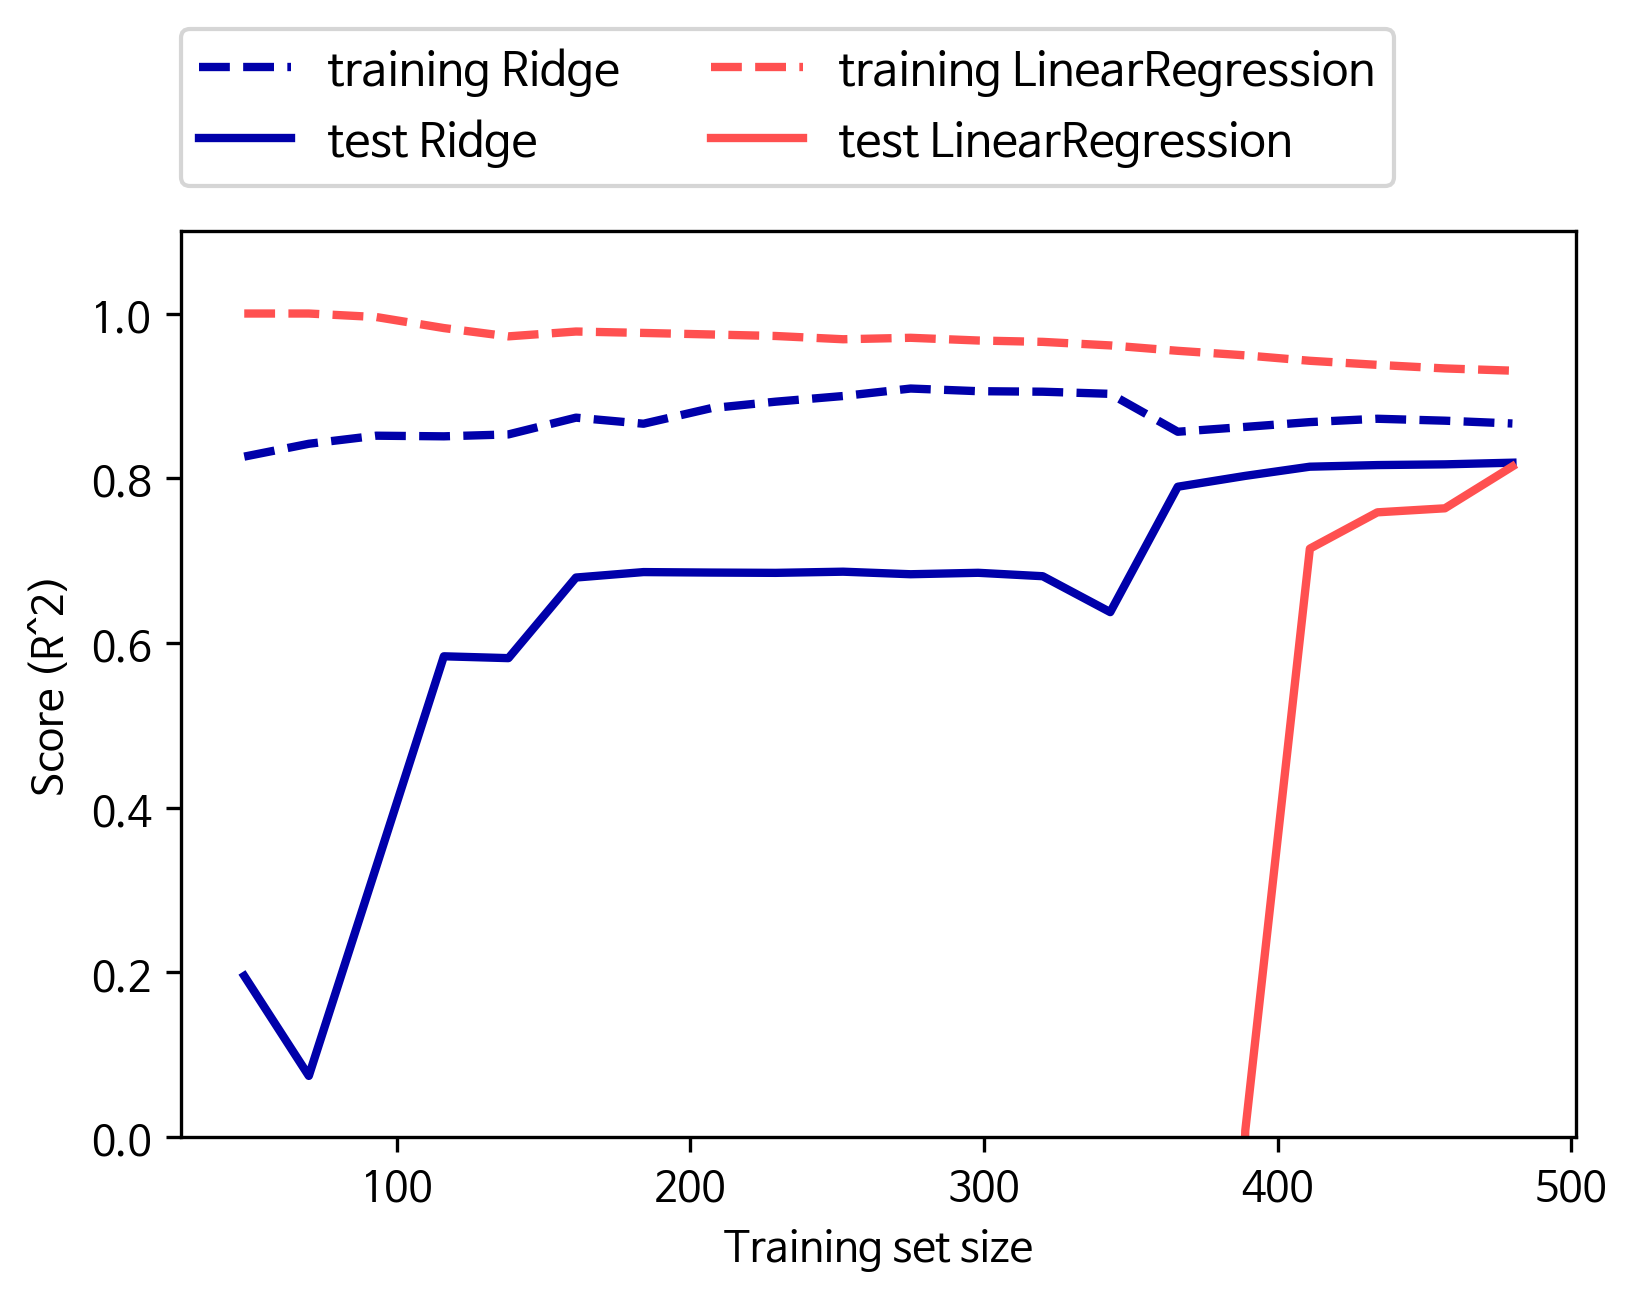

In [35]:
mglearn.plots.plot_ridge_n_samples()

# 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프 : 학습곡선(learning curve)

# 데이터가 많아질수록 좋아지고 마지막에는 선형 회귀가 릿지 회귀를 따라잡는다.
# 데이터를 충분히 주면 규제 항은 덜 중요해져서 릿지 회귀와 선형 회귀의 성능이 같아진다.
# 흥미로운 점 : 선형 회귀의 훈련 데이터 성능이 감소한다. => 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어렵다.

# 라쏘(Lasso)
## 선형 회귀에 규제를 적용하는 Ridge의 대안
## 라쏘도 계수를 0에 가깝게 만들려고 하는데 방식이 조금 다름 -> L1규제
## L1 규제의 결과로 라쏘를 사용할 때 어떤 계수는 정말 0이 된다. -> 모델에서 완전히 제외되는 특성이 생긴다. -> 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 특성이 무엇인지 드러내준다.
## -> 특성 선택(feature selection)이 자동으로 이뤄진다고 볼 수 있다.

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso.coef_ !=0)))

# Lasso는 훈련, 테스트 세트 모두에서 결과가 안 좋음. -> 과소적합, 104 특성 중 4개만 사용
# Lasso도 계수를 얼마나 강하게 0으로 보낼지를 조절하는 alpha 매개변수를 지원.

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4


In [37]:
# 과소적합을 줄이기 위해 alpha 값을 줄일 예정 -> max_iter(반속 실행하는 최대 횟수)
# "max_iter" 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("사용한 특성의 수: {}".format(np.sum(lasso001.coef_ !=0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.90
사용한 특성의 수: 33


In [38]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso00001.coef_ !=0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 수: 94


(-25, 25)

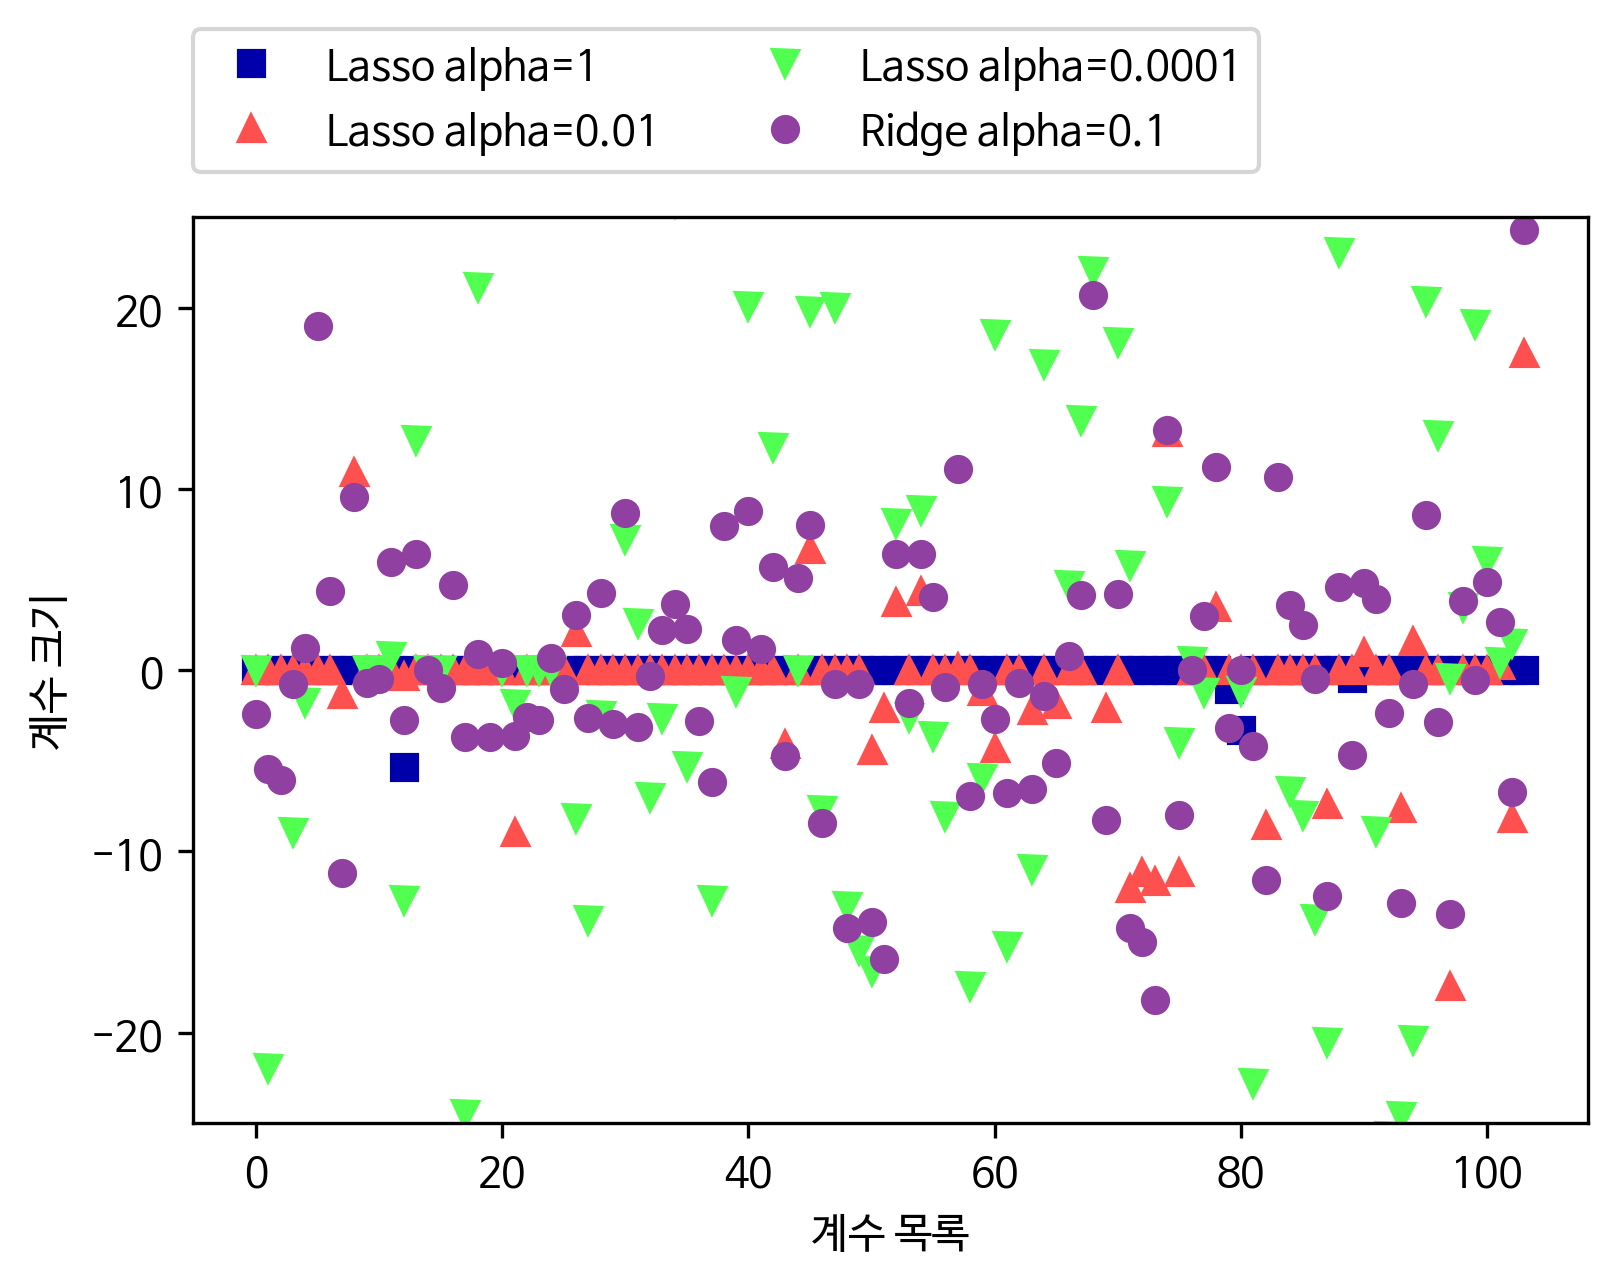

In [39]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)

# Ridge를 사용하면 어떤 계수도 0이 되지 않는다.
# 실제로 두 모델 중 릿지 회귀 선호
# 하지만 특성이 많고 그중 일부분만 중요하다면 Lasso가 더 좋은 선택일 수도
# 분석하기 쉬운 모델을 원한다면 Lassor가 입력 특성 중 일부만 사용하므로 쉽게 해석할 수 있는 모델을 만들어줄 것이다.
# scikit-learn은 Lasso와 Ridge의 페널티를 결합한 ElastickNet도 제공하고 최상의 성능을 내지만 L1규제와 L2규제를 위한 매개변수 두 개를 조정해야 한다.

# 분류용 선형 모델
## 이진 분류(binary classification)
### 특성들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0과 비교
### 함수에서 계산한 값이 0보다 작으면 클래스를 -1이라고 예측
### 0보다 크면 +1이라고 예측 --> 분류에 쓰이는 모든 선형모델에서 동일
## (이진) 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기

## 선형 모델을 학습시키는 알고리즘
* 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
* 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

## 가장 널리 알려진 두 개의 선형 분류 알고리즘
### 로지스틱 회귀(logistic regression)
### 서포트 벡터 머신(support vector machine)

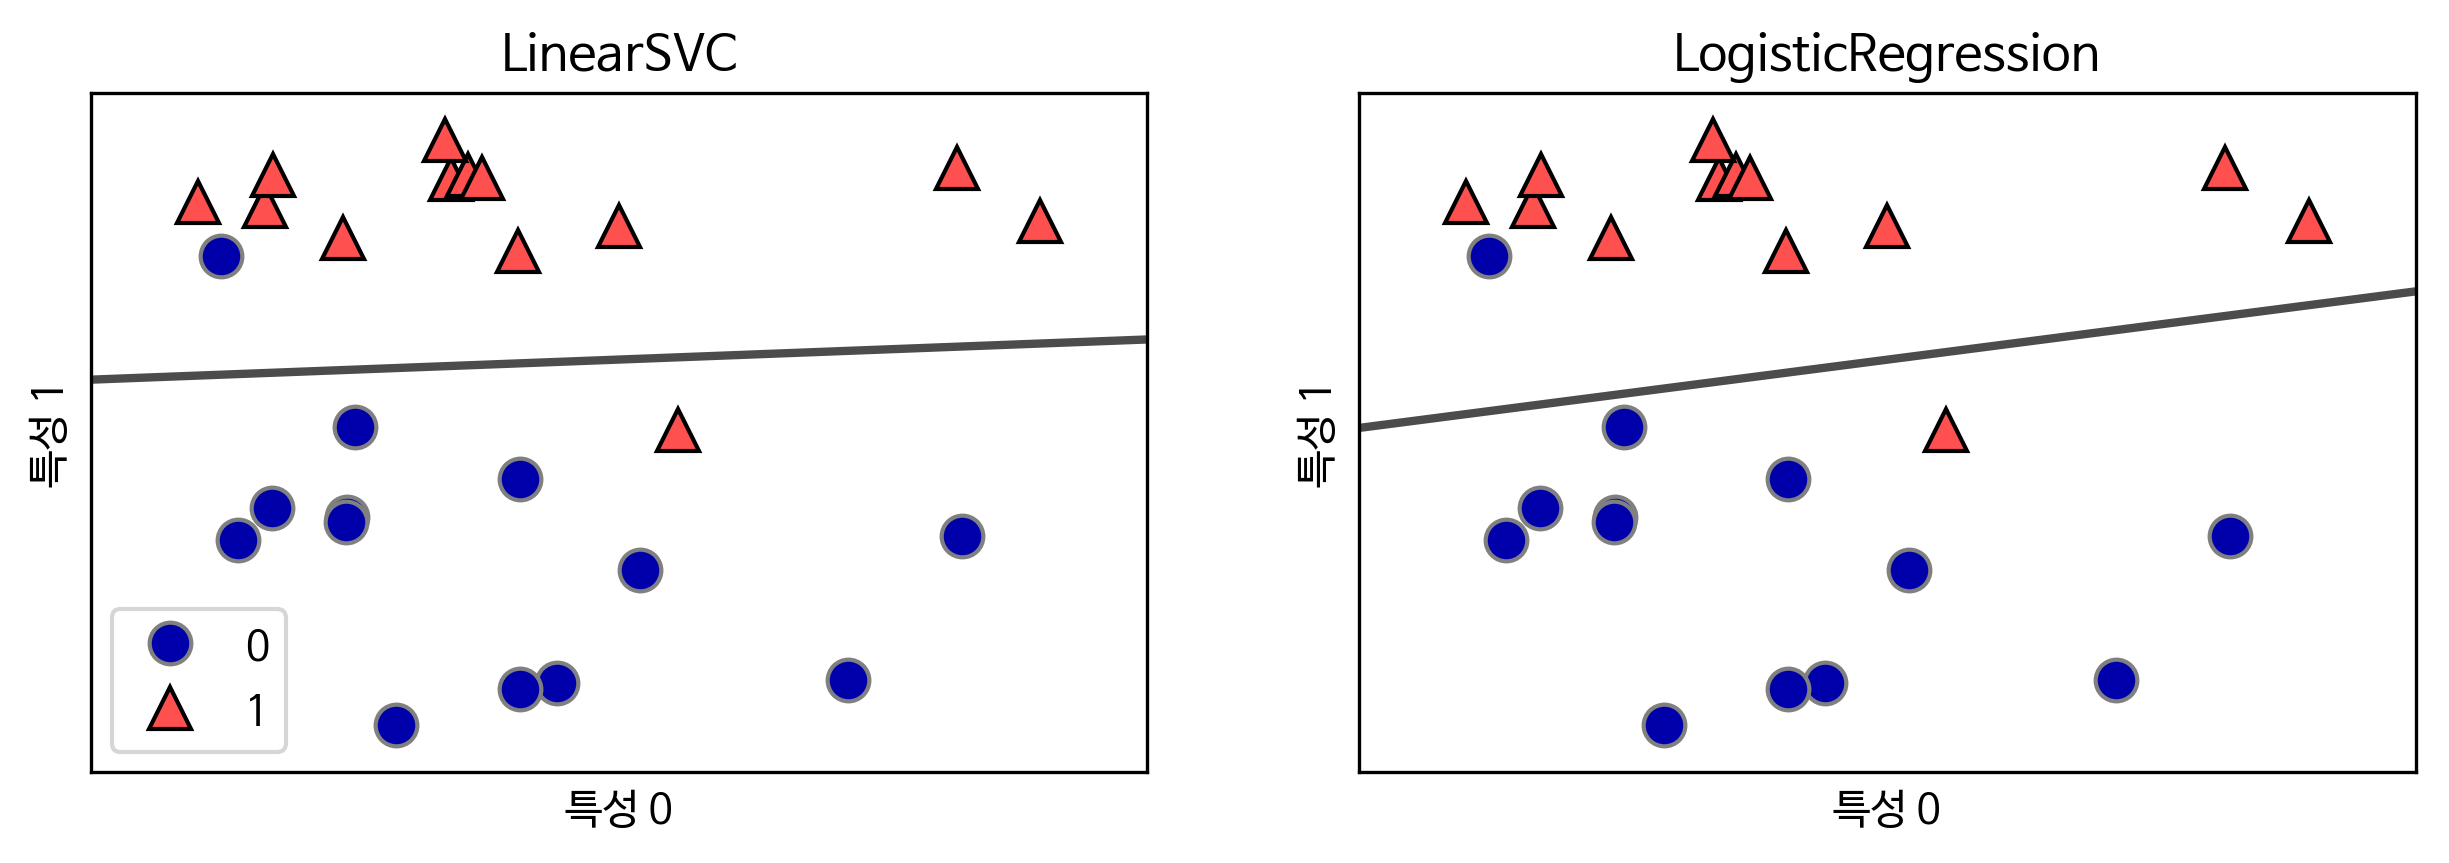

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

# LogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C.
# C의 값이 높아지면 규제가 감소(훈련 세트에 가능한 최대로 맞추려 한다.) -> 개개의 데이터 포인트를 정확히 분류하려고 노력.
# C의 값이 낮아지면 모델은 계수 벡터(w)가 0에 가까워지도록 만든다. -> 데이터 포인트 중 다수에 맞추려고 함.

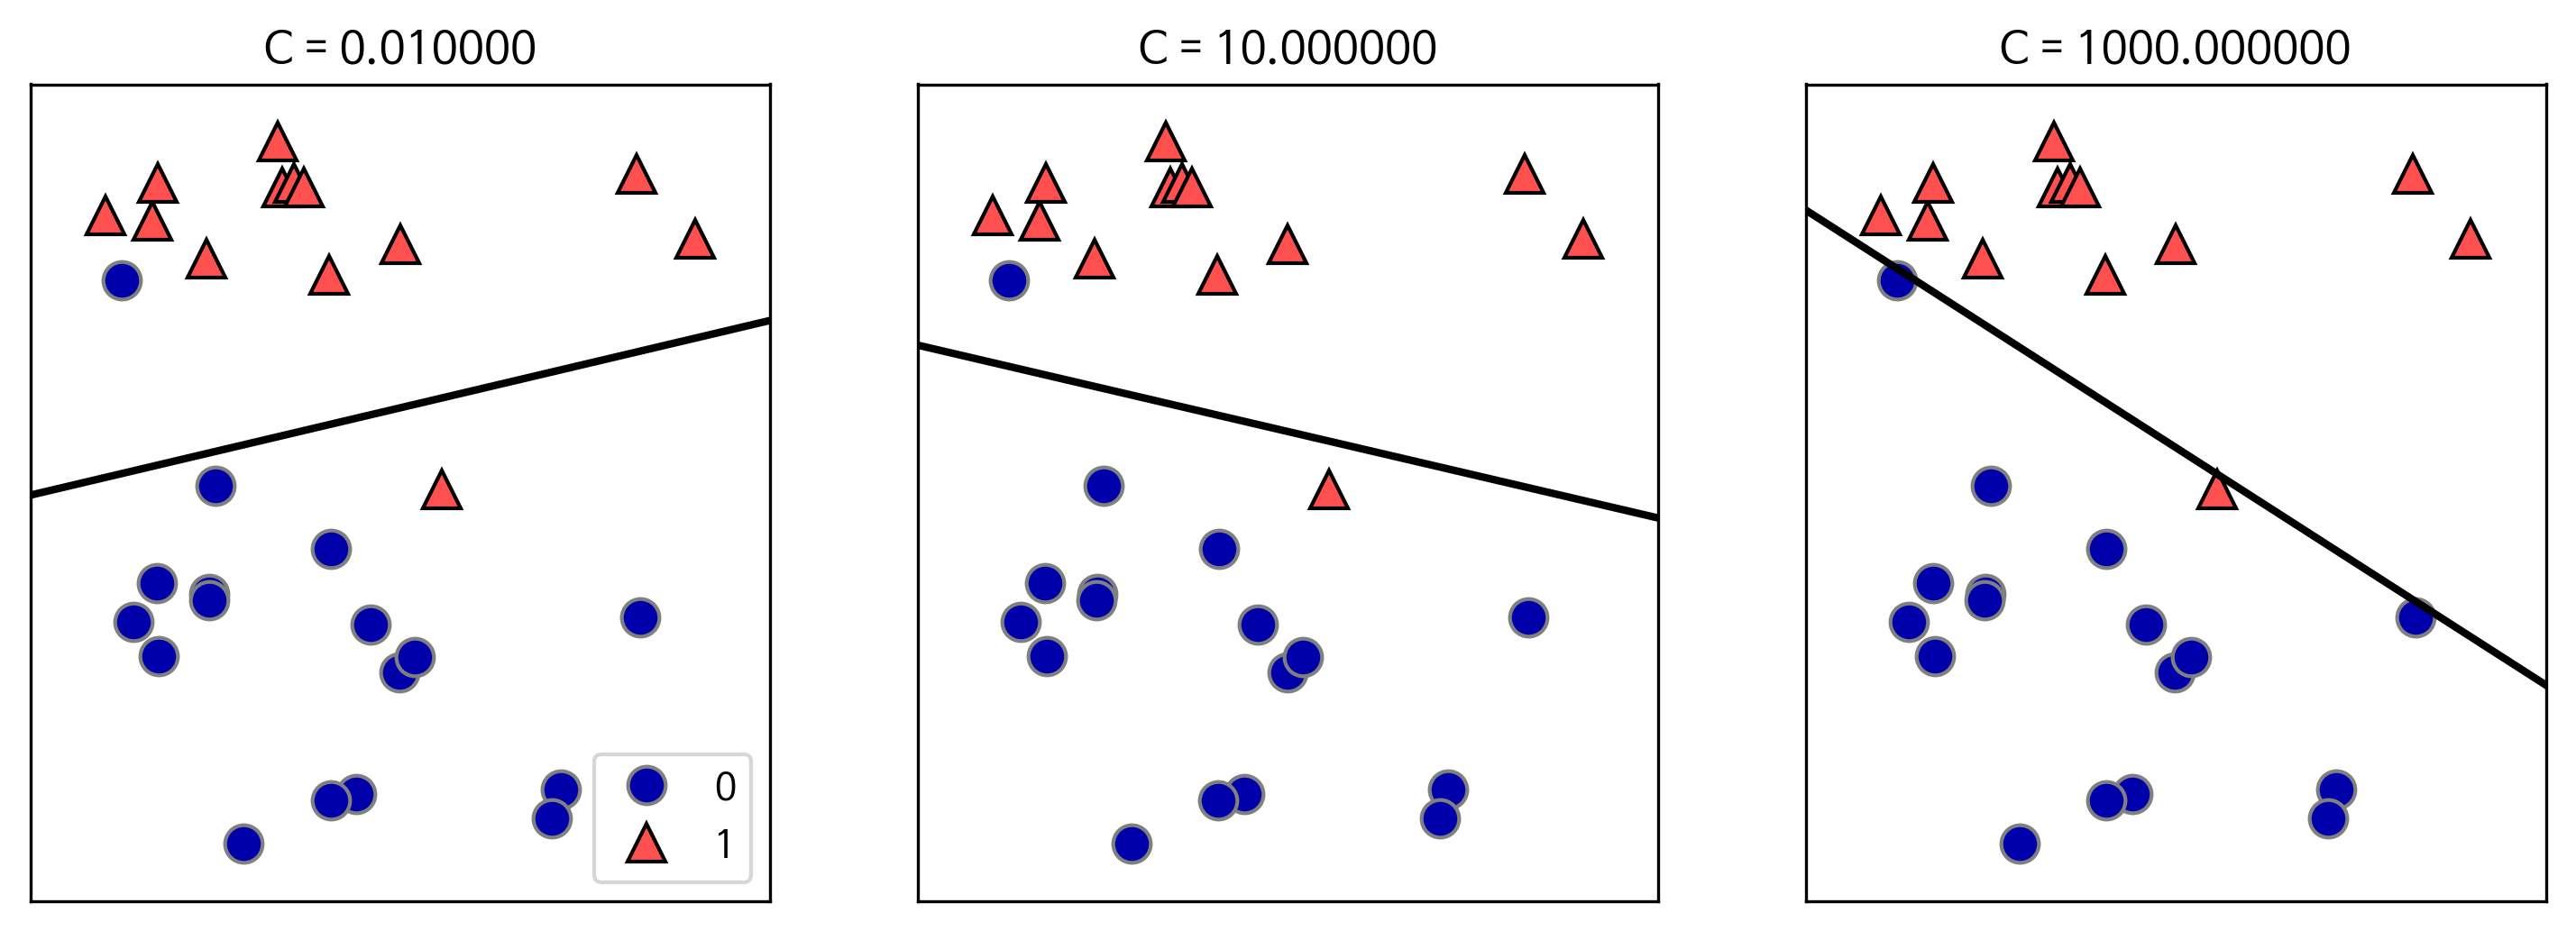

In [41]:
mglearn.plots.plot_linear_svc_regularization()

# 오른쪽 : 과대적합

In [42]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

# 성능이 좋지만 훈련 세트와 테스트 세트의 성능이 매우 비슷하므로 과소적합

훈련 세트 점수: 0.955
테스트 세트 점수: 0.958


In [43]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.972
테스트 세트 점수: 0.965


In [44]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


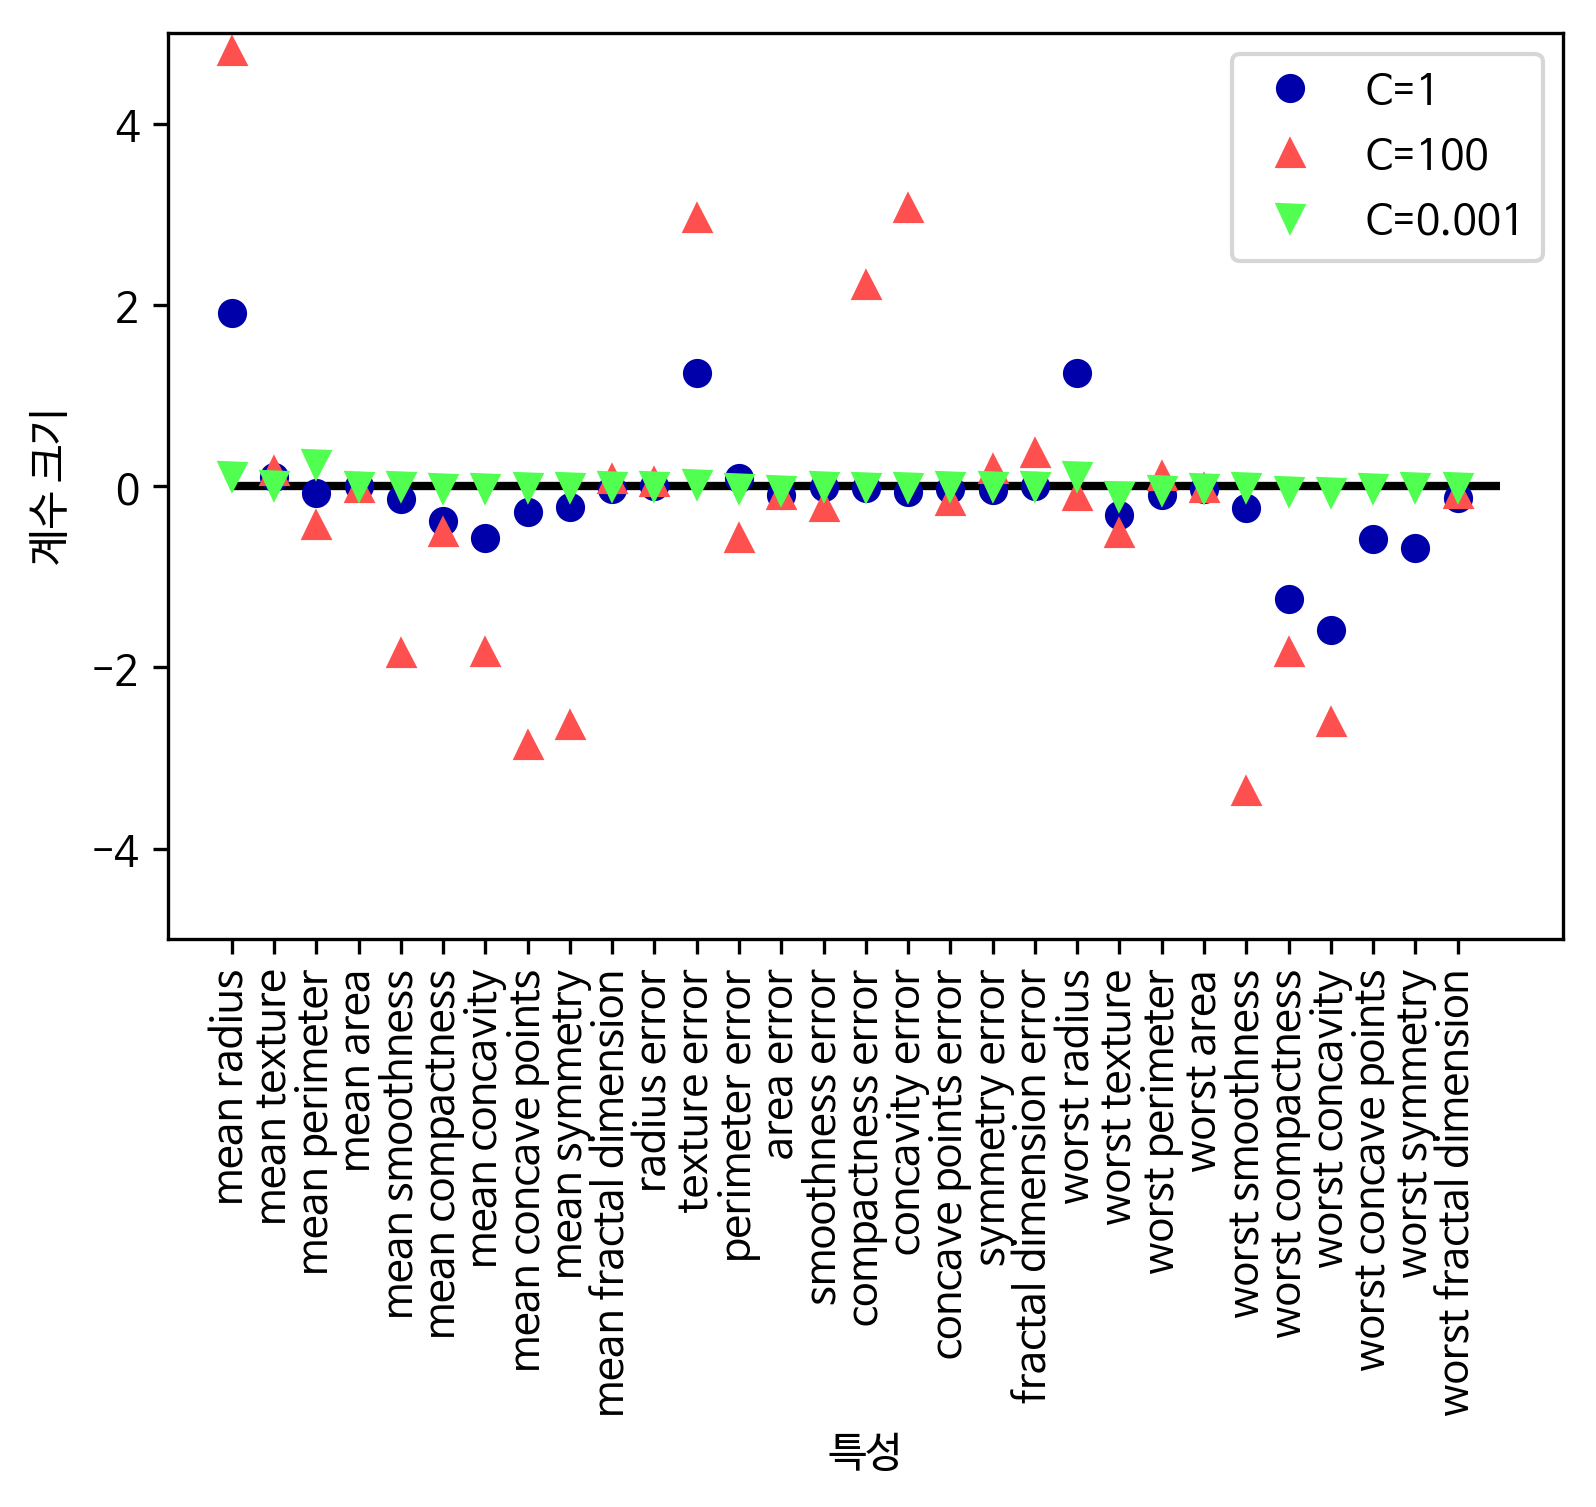

In [45]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

C=0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000인 l1 로지스틱 회귀의 테스트 정확도: 0.98


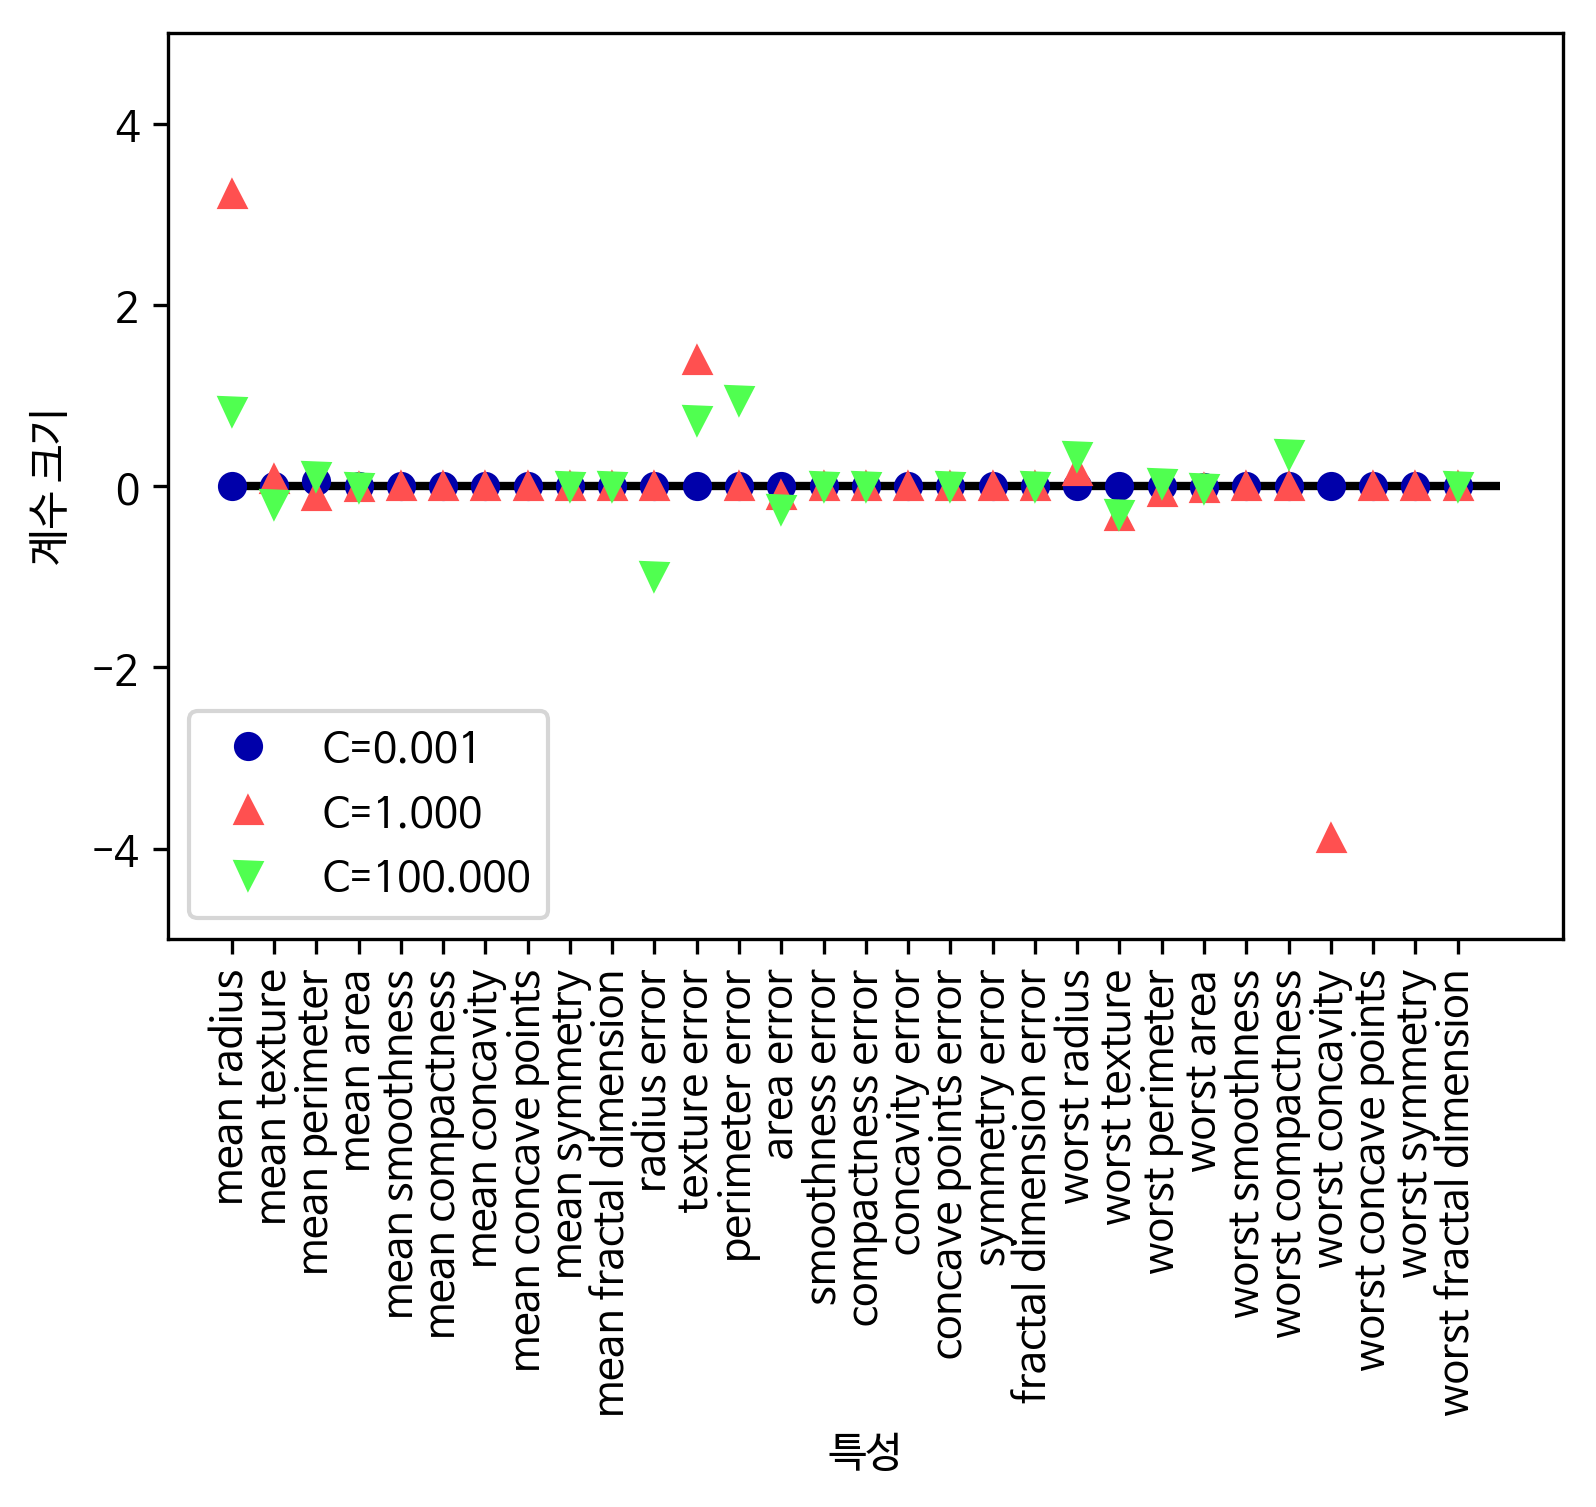

In [46]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
    C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
    C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
        
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("특성")
plt.ylabel("계수 크기")
        
plt.ylim(-5, 5)
plt.legend(loc=3)

# 회귀에서처럼, 모델들의 주요 차이는 규제에서 모든 특성을 이용할지 일부 특성만을 사용할지 결정하는 penalty 매개변수.
# LogisticRegression과 LinearSVC의 penalty 매개변수에 설정할 수 있는 값은 일부 특성만 사용하게 되는 L1 규제를 나타내는 l1과
# 전체 특성을 모두 사용하는 L2 규제의 l2이다.

# 다중 클래스 분류용 선형 모델
## (로지스틱 회귀(소프트맥스 함수를 사용한 다중 클래스 분류 알고리즘 지원))을 제외하고 많은 선형 분류 모델은 태생적으로 이진 분류만을 지원.(다중클래스 지원X)
## 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법인 일대다(one-vs.-rest)방법.
## -> 결국 클래스의 수만큼 이진 분류 모델이 만들어진다.

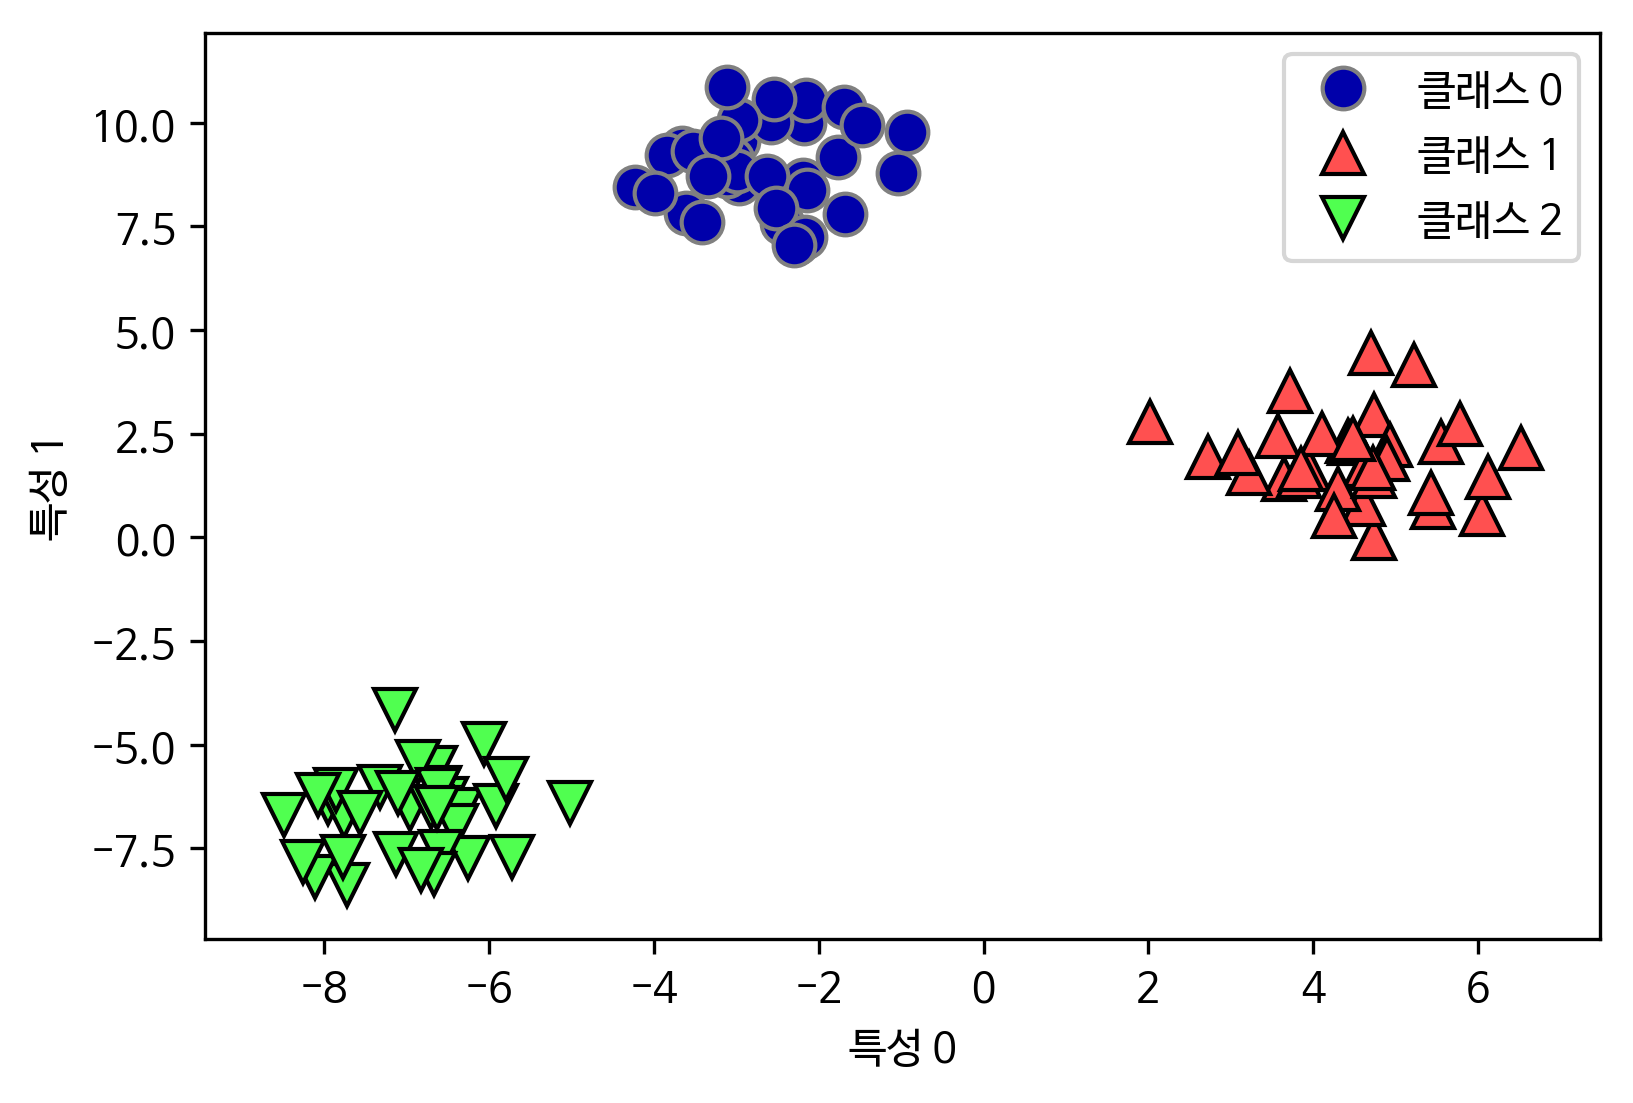

In [47]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [48]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


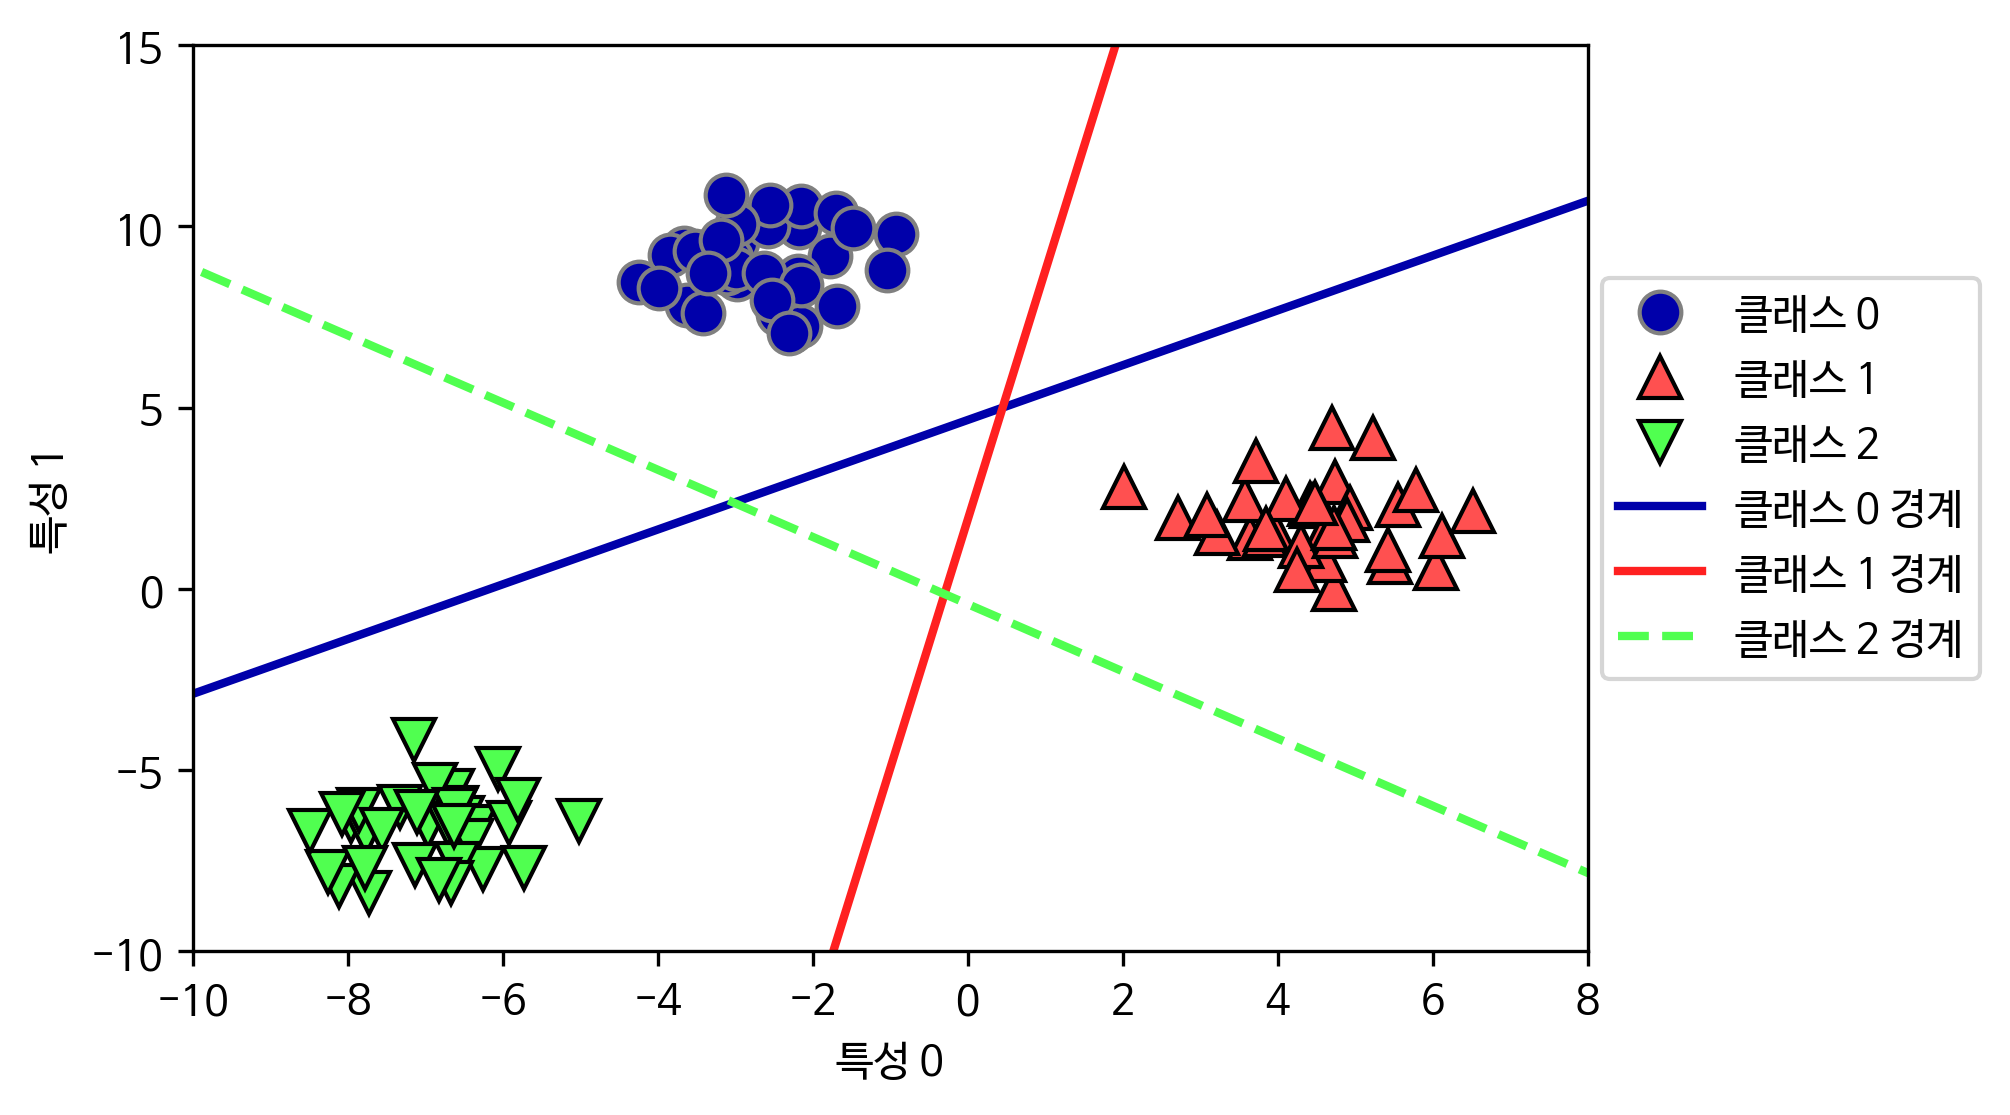

In [49]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))

Text(0,0.5,'특성 1')

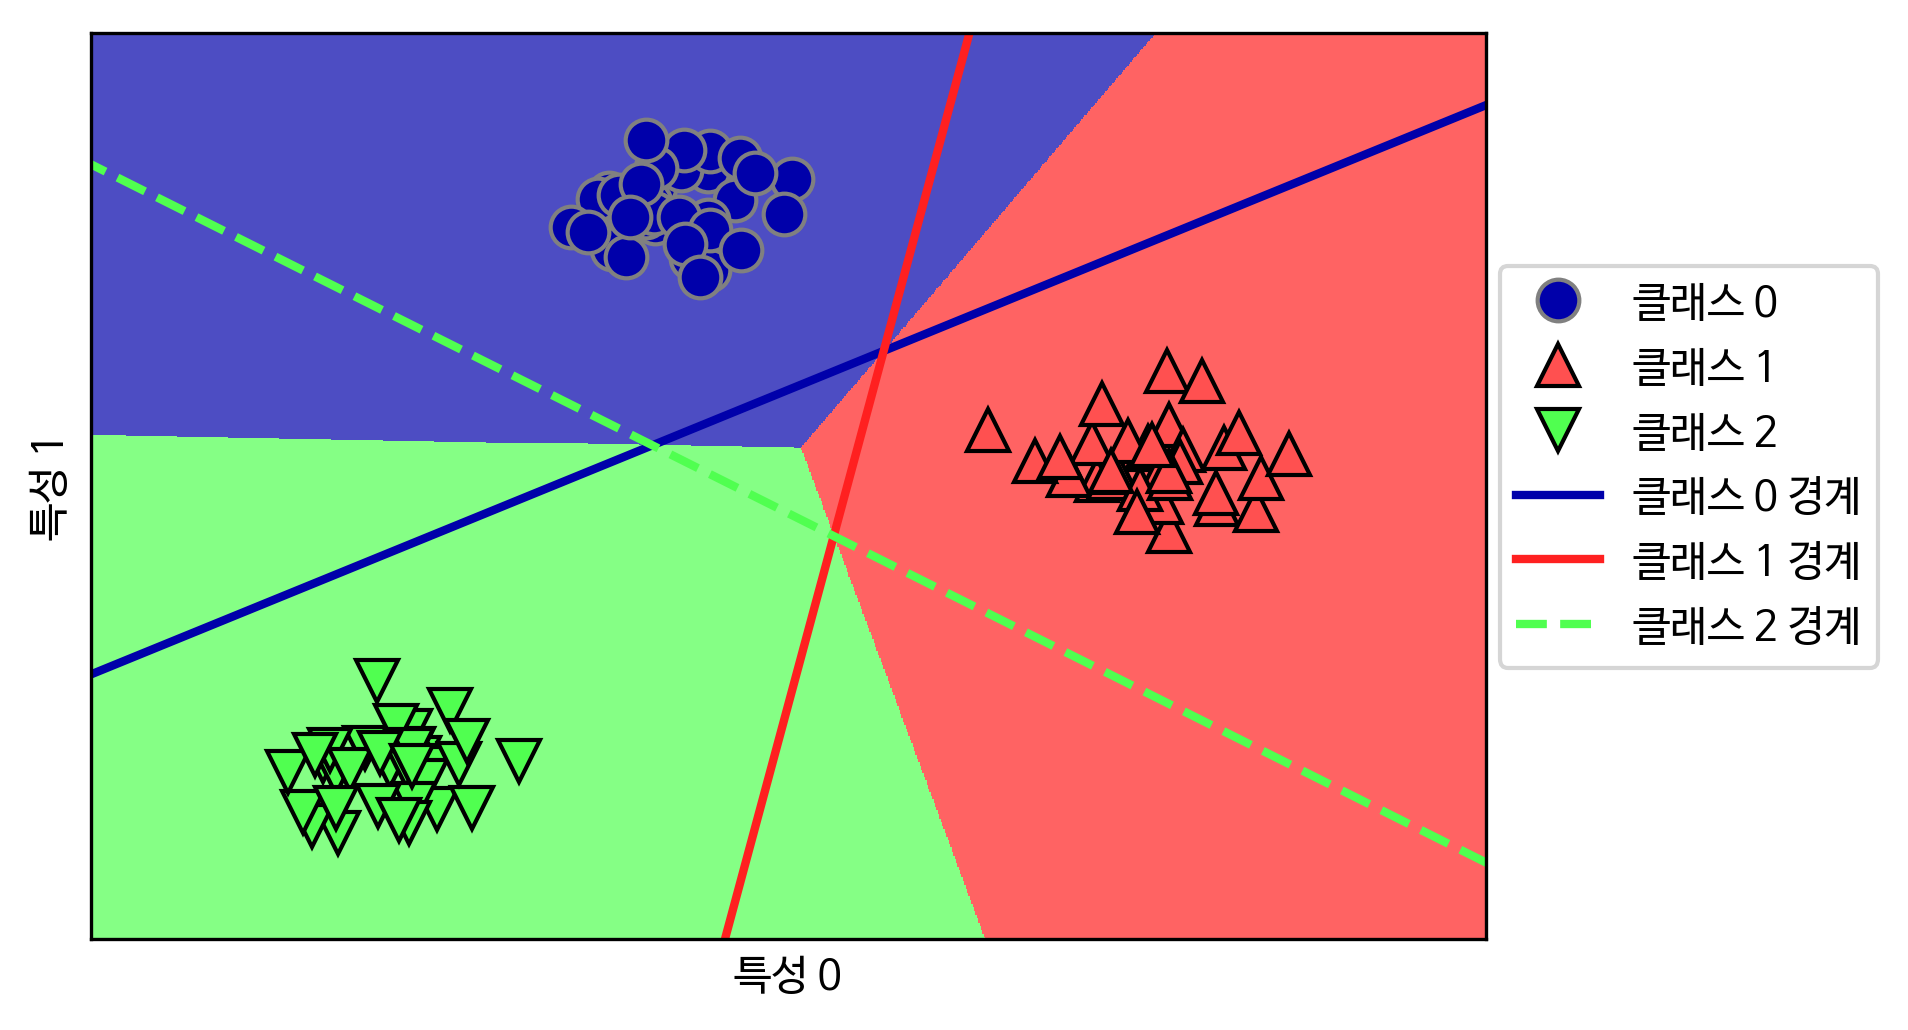

In [50]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01,0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## 선형 모델의 주요 매개변수 
### 회귀모델 : alpha
### LinearSVC와 LogisticRegression : C
### alpha값이 클수록, C 값이 작을수록 모델이 단순.
### 로그 스케일(자릿수가 바뀌도록 10배씩) 조정해 최적치 정함
### 중요한 특성이 많지 않다, 모델의 해석이 중요한 요소일 때 : L1 규제
### 그렇지 않으면 기본적으로 L2 규제

# 선형 모델의 특징
* 학습 속도, 예측 빠름
* 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동
* 대용량 데이터셋(수십만~수백만)이라면 기본 설정보다 빨리 처리하도록 LogisticRegression과 Ridge에 solver='sag' 옵션을 준다.
* SGDClassifier와 SGDRegressor가 다른 대안

In [51]:
logreg = LogisticRegression().fit(X_train, y_train)
# 모든 scikit-learn의 fit 메서드는 self를 반환한다.
# 한 줄 에서 모델의 객체 생성과 학습을 한 번에 실행할 수 있음.
# fit 메서드의 반환값(즉, self)은 학습된 모델로, 변수 logreg에 할당
# 이 처럼 메소드 호출을 잇는 것(_init_와 fit)을 메서드 연결(method chaining)이라고 한다.

In [52]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [53]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)
# 이렇게 짧게 쓰는건 바람직X. 한 줄에 너무 많은 메서드가 들어가면 읽기 어려움.
# 학습된 로지스틱 회귀 모델은 변수에 할당되지 않아 다른 데이터에 대해 예측하거나 만들어진 모델을 분석X

# 나이브 베이즈 분류기
## 선형 모델과 매우 유사
## 선형 분류기보다 훈련 속도 빠름. 일반화 성능 조금 뒤짐.
## 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합 : 효과적
## GaussianNB : 연속적인 어떤 데이터에도 적용
## BernoulliNB : 이진 데이터, 텍스트
## MultinomialNB : 카운트 데이터(특성이 어떤 것을 헤아린 정수 카운트), 이산적 데이터, 텍스트


In [54]:
X = np.array([[0, 1, 0, 1],
            [1, 0, 1, 1],
            [0, 0, 0, 1],
            [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [55]:
counts = {}
for label in np.unique(y):
    # 클래스마다 반복
    # 특성마다 1이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트:\n{}".format(counts))

특성 카운트:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


### MultinomialNB, BernoulliNB : 복잡도를 조절하는 alpha 가짐, 텍스트 간은 희소한 데이터를 카운트
### alpha가 주어지면 알고리즘이 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 alpha 개수만큼 추가. -> 통계 데이터를 완만하게 해준다.
### alpha가 크면 더 완만해지고 모델의 복잡도는 낮아진다.
### alpha에 따른 알고리즘 성능 변동이 비교적 크지 않아서 성능 향상에 크게 기여하진 않지만 조절 시 어느정도 정확도를 높일 수 있다.

### GaussianNB : 대부분 매우 고차원인 데이터셋에 사용

## 나이브 베이즈 모델과 선형 모델의 장단점은 비슷.
## 훈련과 예측 빠름, 과정 이해 쉬움
## 희소한 고차원 데이터에서 잘 작동, 비교적 매개변수에 민감하지 않는다.
## 매우 큰 데이터셋에서 나이브 베이즈 모델을 시도해볼만 하다.



# 결정 트리(decision tree)
## 분류와 회귀 문제에 널리 사용
## 결정에 다다르기 위해 예/아니오 질문을 이어나가면서 학습

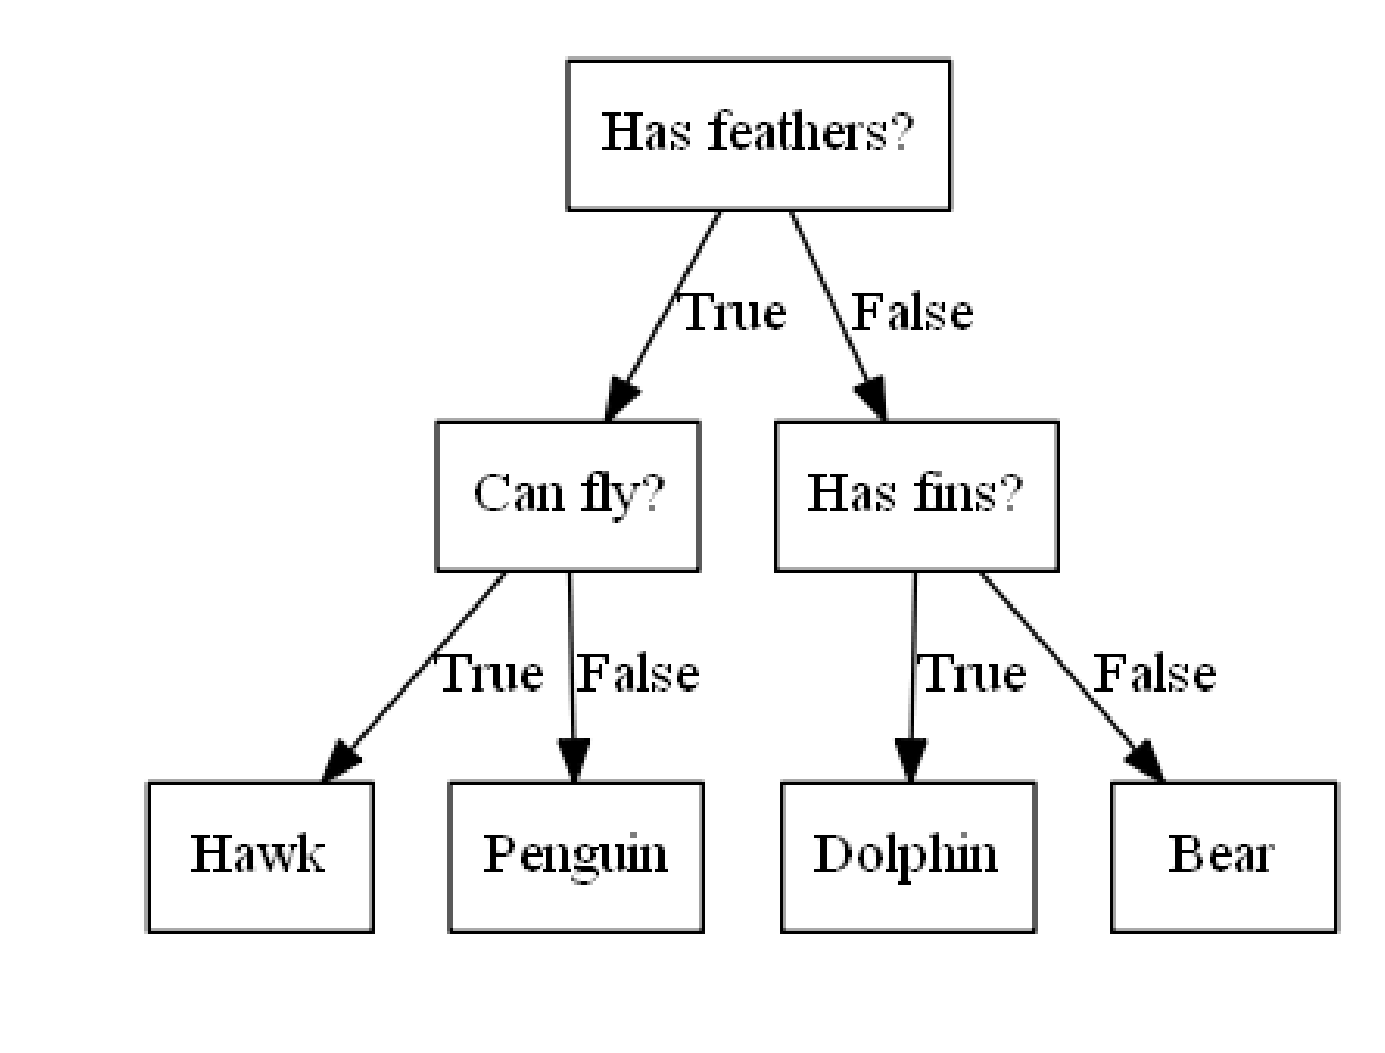

In [56]:
mglearn.plots.plot_animal_tree()
# conda install graphviz
# conda install python-graphviz

## 결정 트리 만들기
### 결정 트리를 학습한다 : 정답에 가장 빨리 도달하는 예/아니오 질문 목록을 학습한다. 질문들 : 테스트
### 반복된 프로세스는 각 노드가 테스트 하나씩을 가진 이진 결정 트리를 만든다.
### 각 테스트는 하나의 축을 따라 데이터를 둘로 나누는 것
### 데이터를 분할하는 것은 각 분할된 영역이 (결정 트리의 리프) 한 개의 타깃값(하나의 클래스나 하나의 회귀 분석 결과)를 가질 때까지 반복
### 타깃 하나로만 이뤄진 리프 노드 : 순수노드(pure node)

## 결정 트리의 복잡도 제어
### 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합.
### 순수 노드로 이루어진 트리는 훈련 세트에 100% 정확히 맞는다는 의미.
### -> 훈련 세트의 모든 데이터 포인트는 정확한 클래스의 리프 노드에 있다.
### 과대적합을 막는 전략
* 트리 생성을 일찍 중단하는 전략(사전 가지치기(pre-pruning))
* 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합(사후 가지치기(post-pruning 또는 그냥 가지치기(pruning))
* 사전 가지치기는 트리의 최대 깊이나 리프의 최대 개수를 제한하거나, 또는 노드가 분할하기 위한 포인트의 최소 개수를 지정하는 것.

### scikit-learn에서 결정 트리는 DecisionTreeRegressor 와 DecisionTreeClassifier에 구현, 사전 가지치기만 지원

In [57]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [58]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


## 결정 트리 분석
### 트리 모듈의 export_graphviz 함수를 이용해 트리를 시작화할 수 있음.
### 그래프 저장용 텍스트 파일 포맷인 .dot 파일을 만든다.
### export_graphviz 함수에 filled 매개변수를 True로 지정하면 노드의 클래스가 구분되도록 색으로 칠해진다.

In [59]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                    feature_names=cancer.feature_names,
                impurity=False, filled=True)

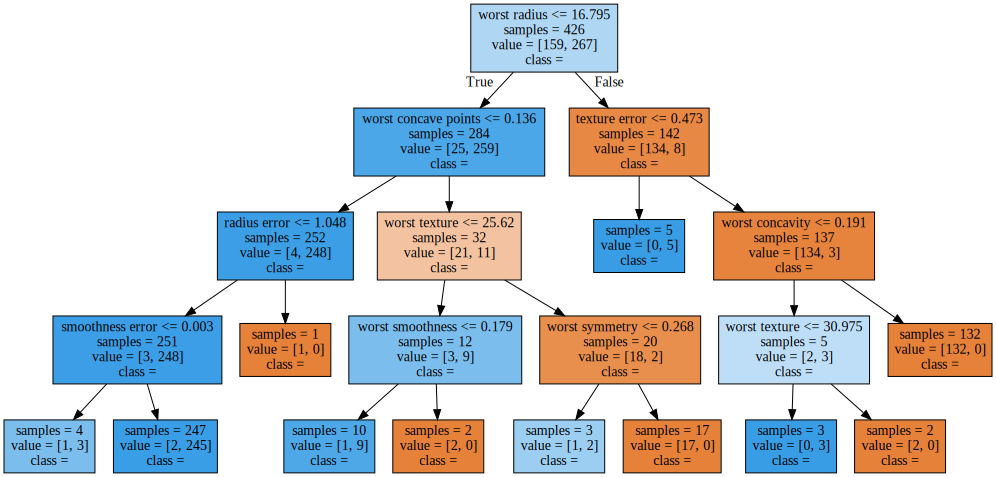

In [60]:
import graphviz

with open("tree.dot", 'rt', encoding='UTF8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# open('파일경로.txt', 'rt', encoding='UTF8')
# cp949 코덱으로 인코딩 된 파일을 읽어들일때 요런 문제가 생긴다고 하는 군요.

# samples : 각 노드에 있는 샘플의 수
# value : 클래스당 샘플의 수를 제공

## 트리 특성 중요도(feature importance)
### 0과 1사이의 숫자로, 0 : 전혀 사용되지 않았다, 1 : 완벽하게 타깃 클래스를 예측했다.
### 특성 중요도의 전체 합은 1

In [61]:
print("특성 중요도: \n{}".format(tree.feature_importances_))

특성 중요도: 
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


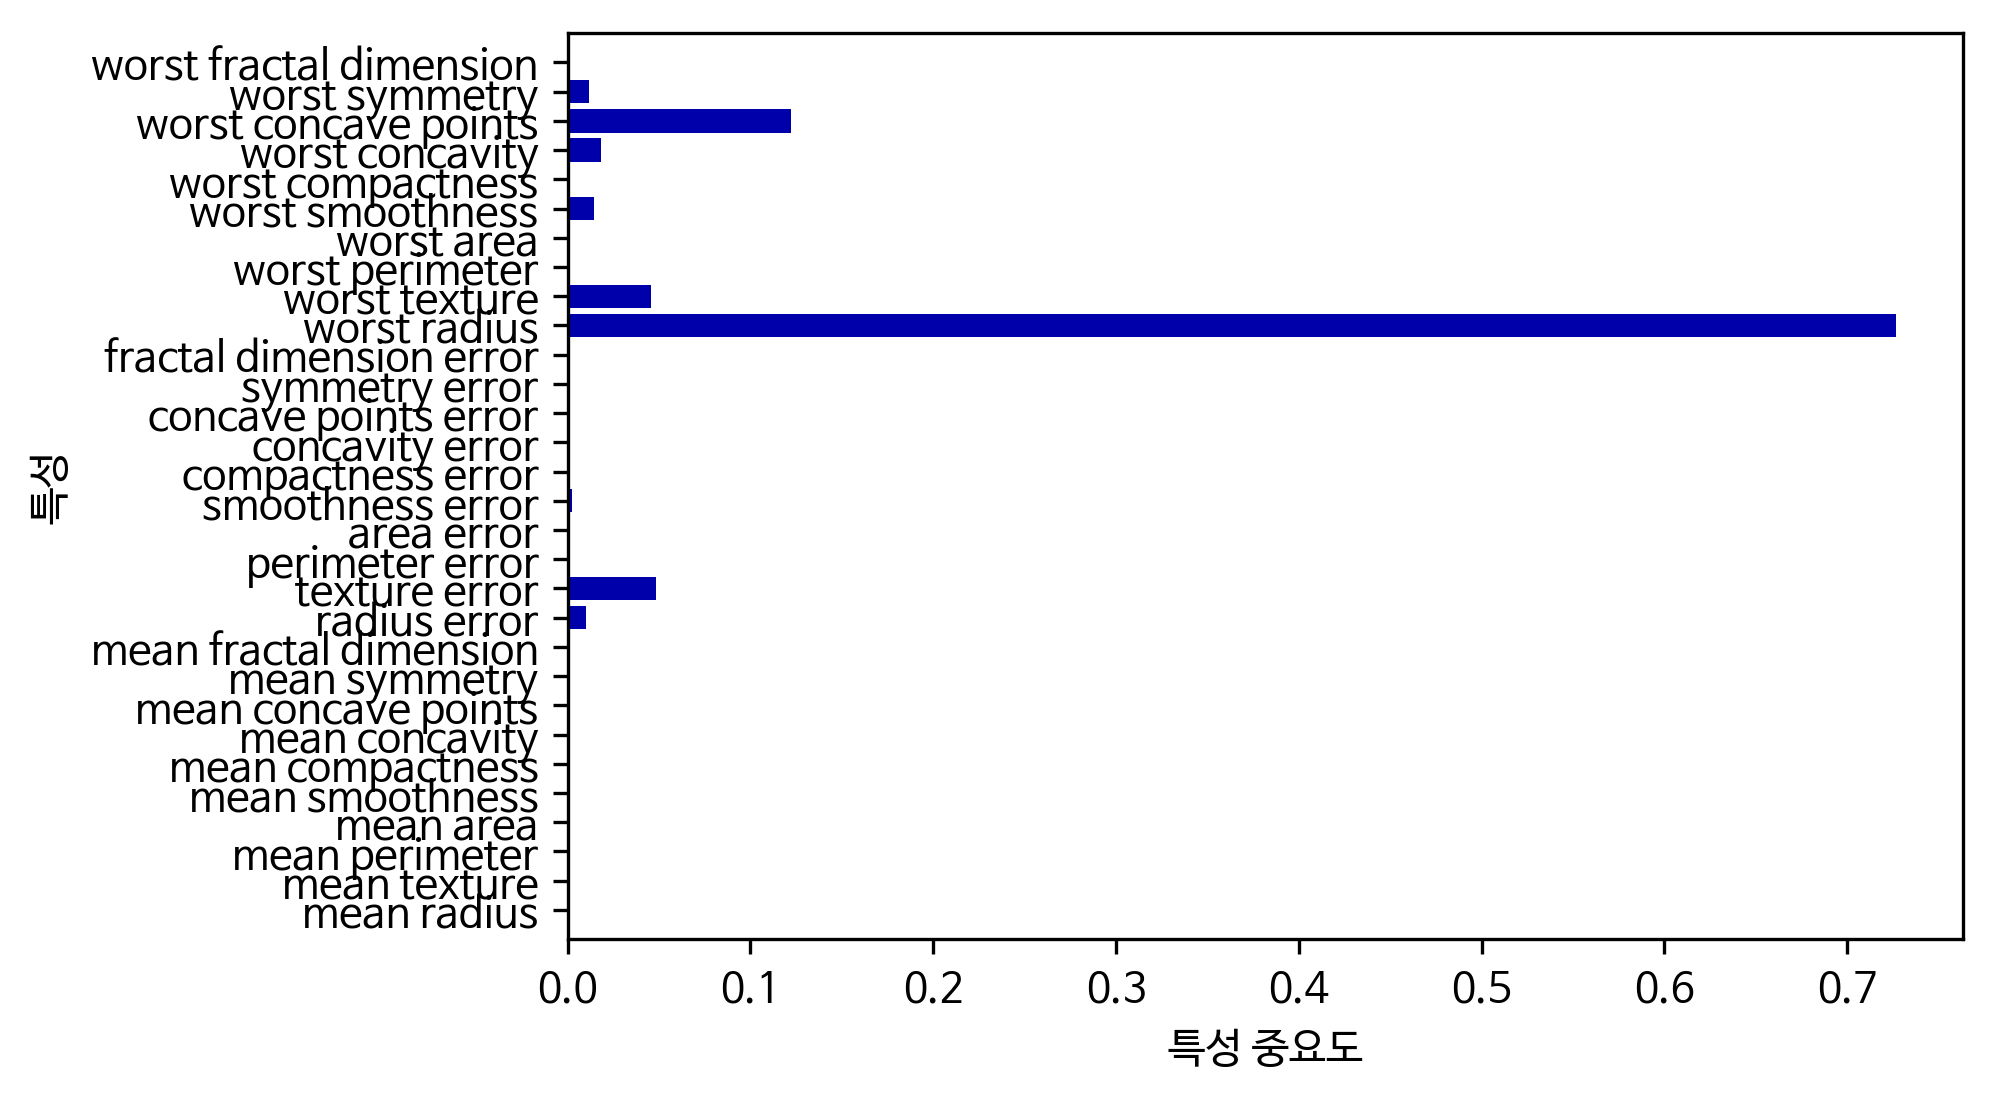

In [62]:
# 특성 중요도의 시각화

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

# 특성 중요도가 낮다고 해서 유용하지 않다는 뜻은 아님.
# 단지 트리가 그 특성을 선택하지 않았을 뿐이며, 다른 특성이 동일한 정보를 지니고 있어서일 수도
# 선형 모델의 계수와는 달리, 특성 중요도는 항상 양수이며 특성이 어떤 클래스를 지지하는지는 알 수 없다.

Feature importances: [0. 1.]


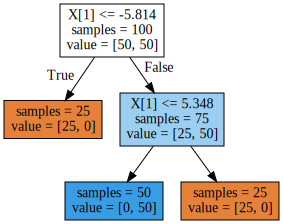

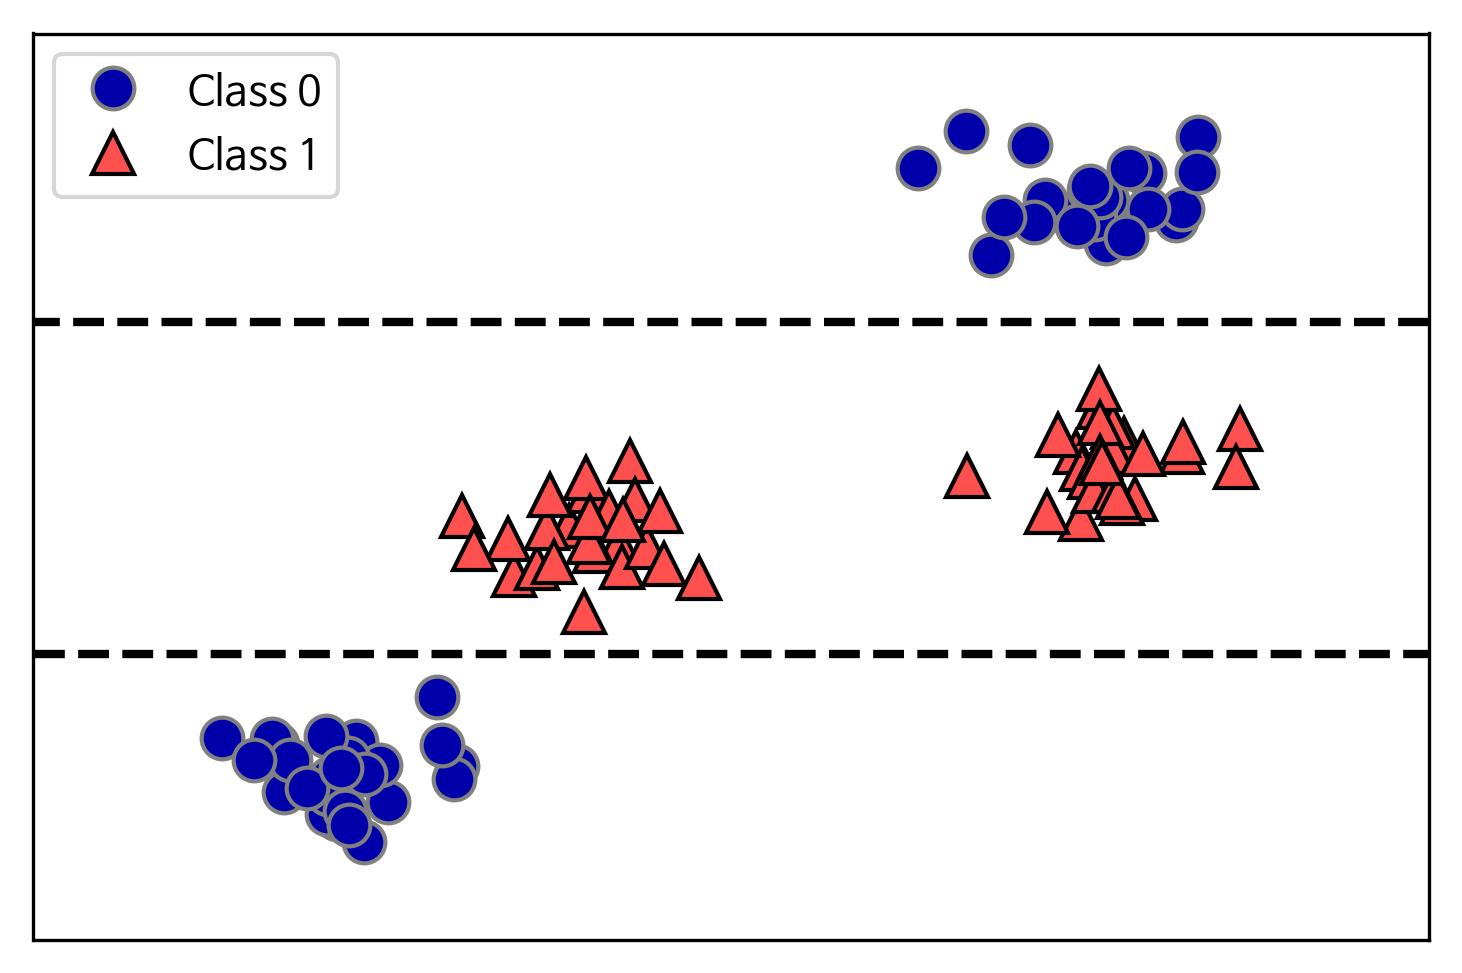

In [63]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0,0.5,'가격 ($/Mbyte)')

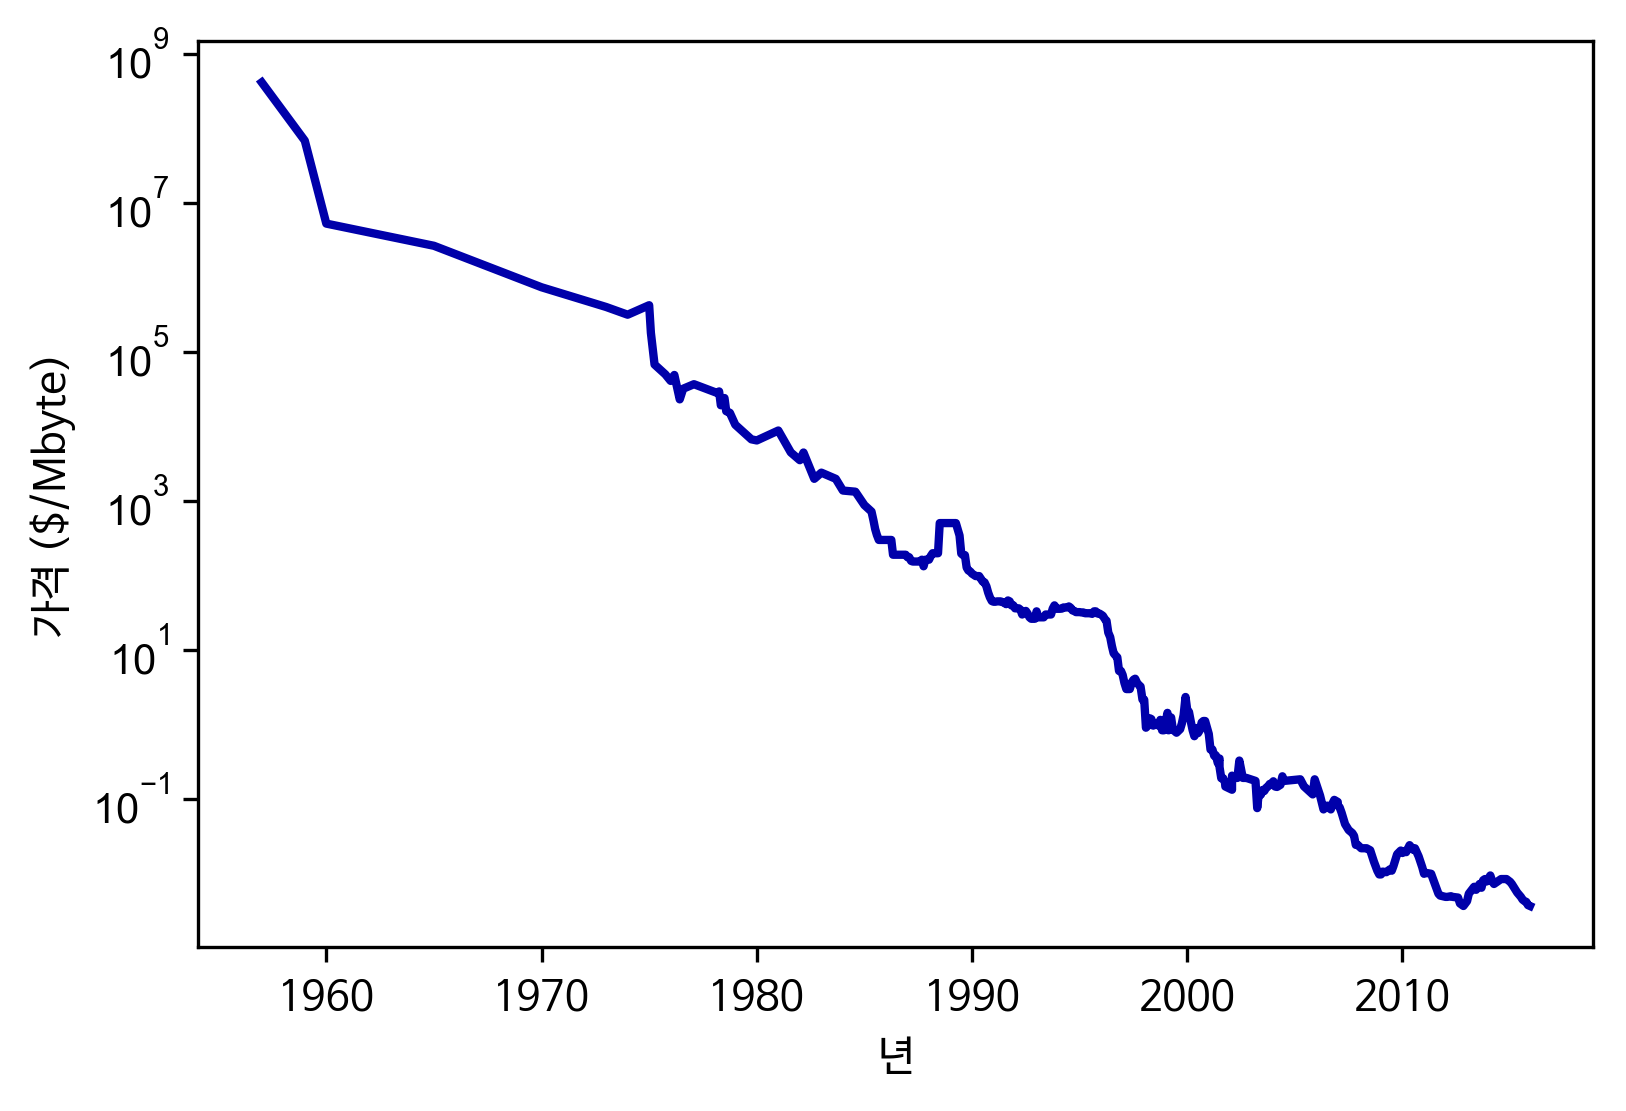

In [87]:
import os
import pandas as pd
mglearn.datasets.DATA_PATH="C:\ProgramData\Anaconda3\lib\site-packages\mglearn\data"
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))


plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [70]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다.
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다.
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다.
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predic(X_all)
pred_lr = linear_reg.predic(X_all)

# 예측한 값의 로그 스케일을 되돌립니다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

NameError: name 'ram_prices' is not defined

In [72]:
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형 회귀 예측")
plt.legend()

NameError: name 'data_train' is not defined

## 결정 트리에서 모델 복잡도를 조절하는 매개변수는 트리가 완전히 만들어지기 전에 멈추게 하는 사전 가지치기 매개변수.
## max_depth, max_leaf_nodes 또는 min_samples_leaf 중 하나만 지정해도 과대적합을 막는 데 충분하다.
* max_depth : 리프 노드의 최대 개수 지정
* min_samples_leaf : 리프 노드가 되기 위한 최소한의 샘플 개수 지정
* min_samples_split : 노드가 분기할 수 있는 최소 샘플 개수 지정

## 만들어진 모델을 쉽게 시각화할 수 있어 비전문가도 이해하기 쉽다 (비교적 작은 트리일 때)
## 데이터의 스케일에 구애받지 않는다.
## 각 특성이 개별적으로 처리되어 데이터를 분할하는데 데이터 스케일의 영향을 받지 않으므로 특성의 정규화나 표준화 같은 전처리 과정이 필요 없다.
## 특성의 스케일이 서로 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동한다.

## 사전 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않다.

# 결정 트리의 앙상블
## 앙상블(ensemble) : 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법.
## 랜덤 포레스트 (random forest) 와 그래디언트 부스팅 (gradient boosting) : 분류와 회귀 문제의 다양한 데이터셋에서 효과적

# 랜덤 포레스트
## 기본적으로 조금씩 다른 여러 결정 트리의 묶음
## 결정 트리를 많이 만들고 각각의 트리는 타깃 예측을 잘 해야 하고 다른 트리와는 구별되어야 한다.
* 데이터 포인트를 무작위로 선택해서 만든다
* 분할 테스트에서 특성을 무작위로 선택하는 방법

## 랜덤 포레스트 구축
### 생성할 트리의 개수를 정한다 (n_estimators)
### n_samples개의 데이터 포인트 중에서 무작위로 데이터를 n_samples 횟수만큼 반복 추출한다.

### 그 다음 결정 트리를 만든다. 알고리즘이 각 노드에서 후보 특성을 무작위로 선택한 후 이 후보들 중에서 최선의 테스트를 찾는다.
### 몇 개의 특성을 고를지는 max_features 매개변수로 조정할 수 있다.

### max_features=1 -> 트리의 분기는 테스트할 특성을 고를 필요가 없고 그냥 무작위로 선택한 특성의 임계값을 찾기만 하면 된다.
### max_features를 크게하면 랜덤 포레스트의 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰진다
### max_features를 낮추면 랜덤 포레스트 트리들은 많이 달라지고 각 트리는 데이터에 맞추기 위해 깊이가 깊어지게 된다.

## 랜덤 포레스트 분석

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

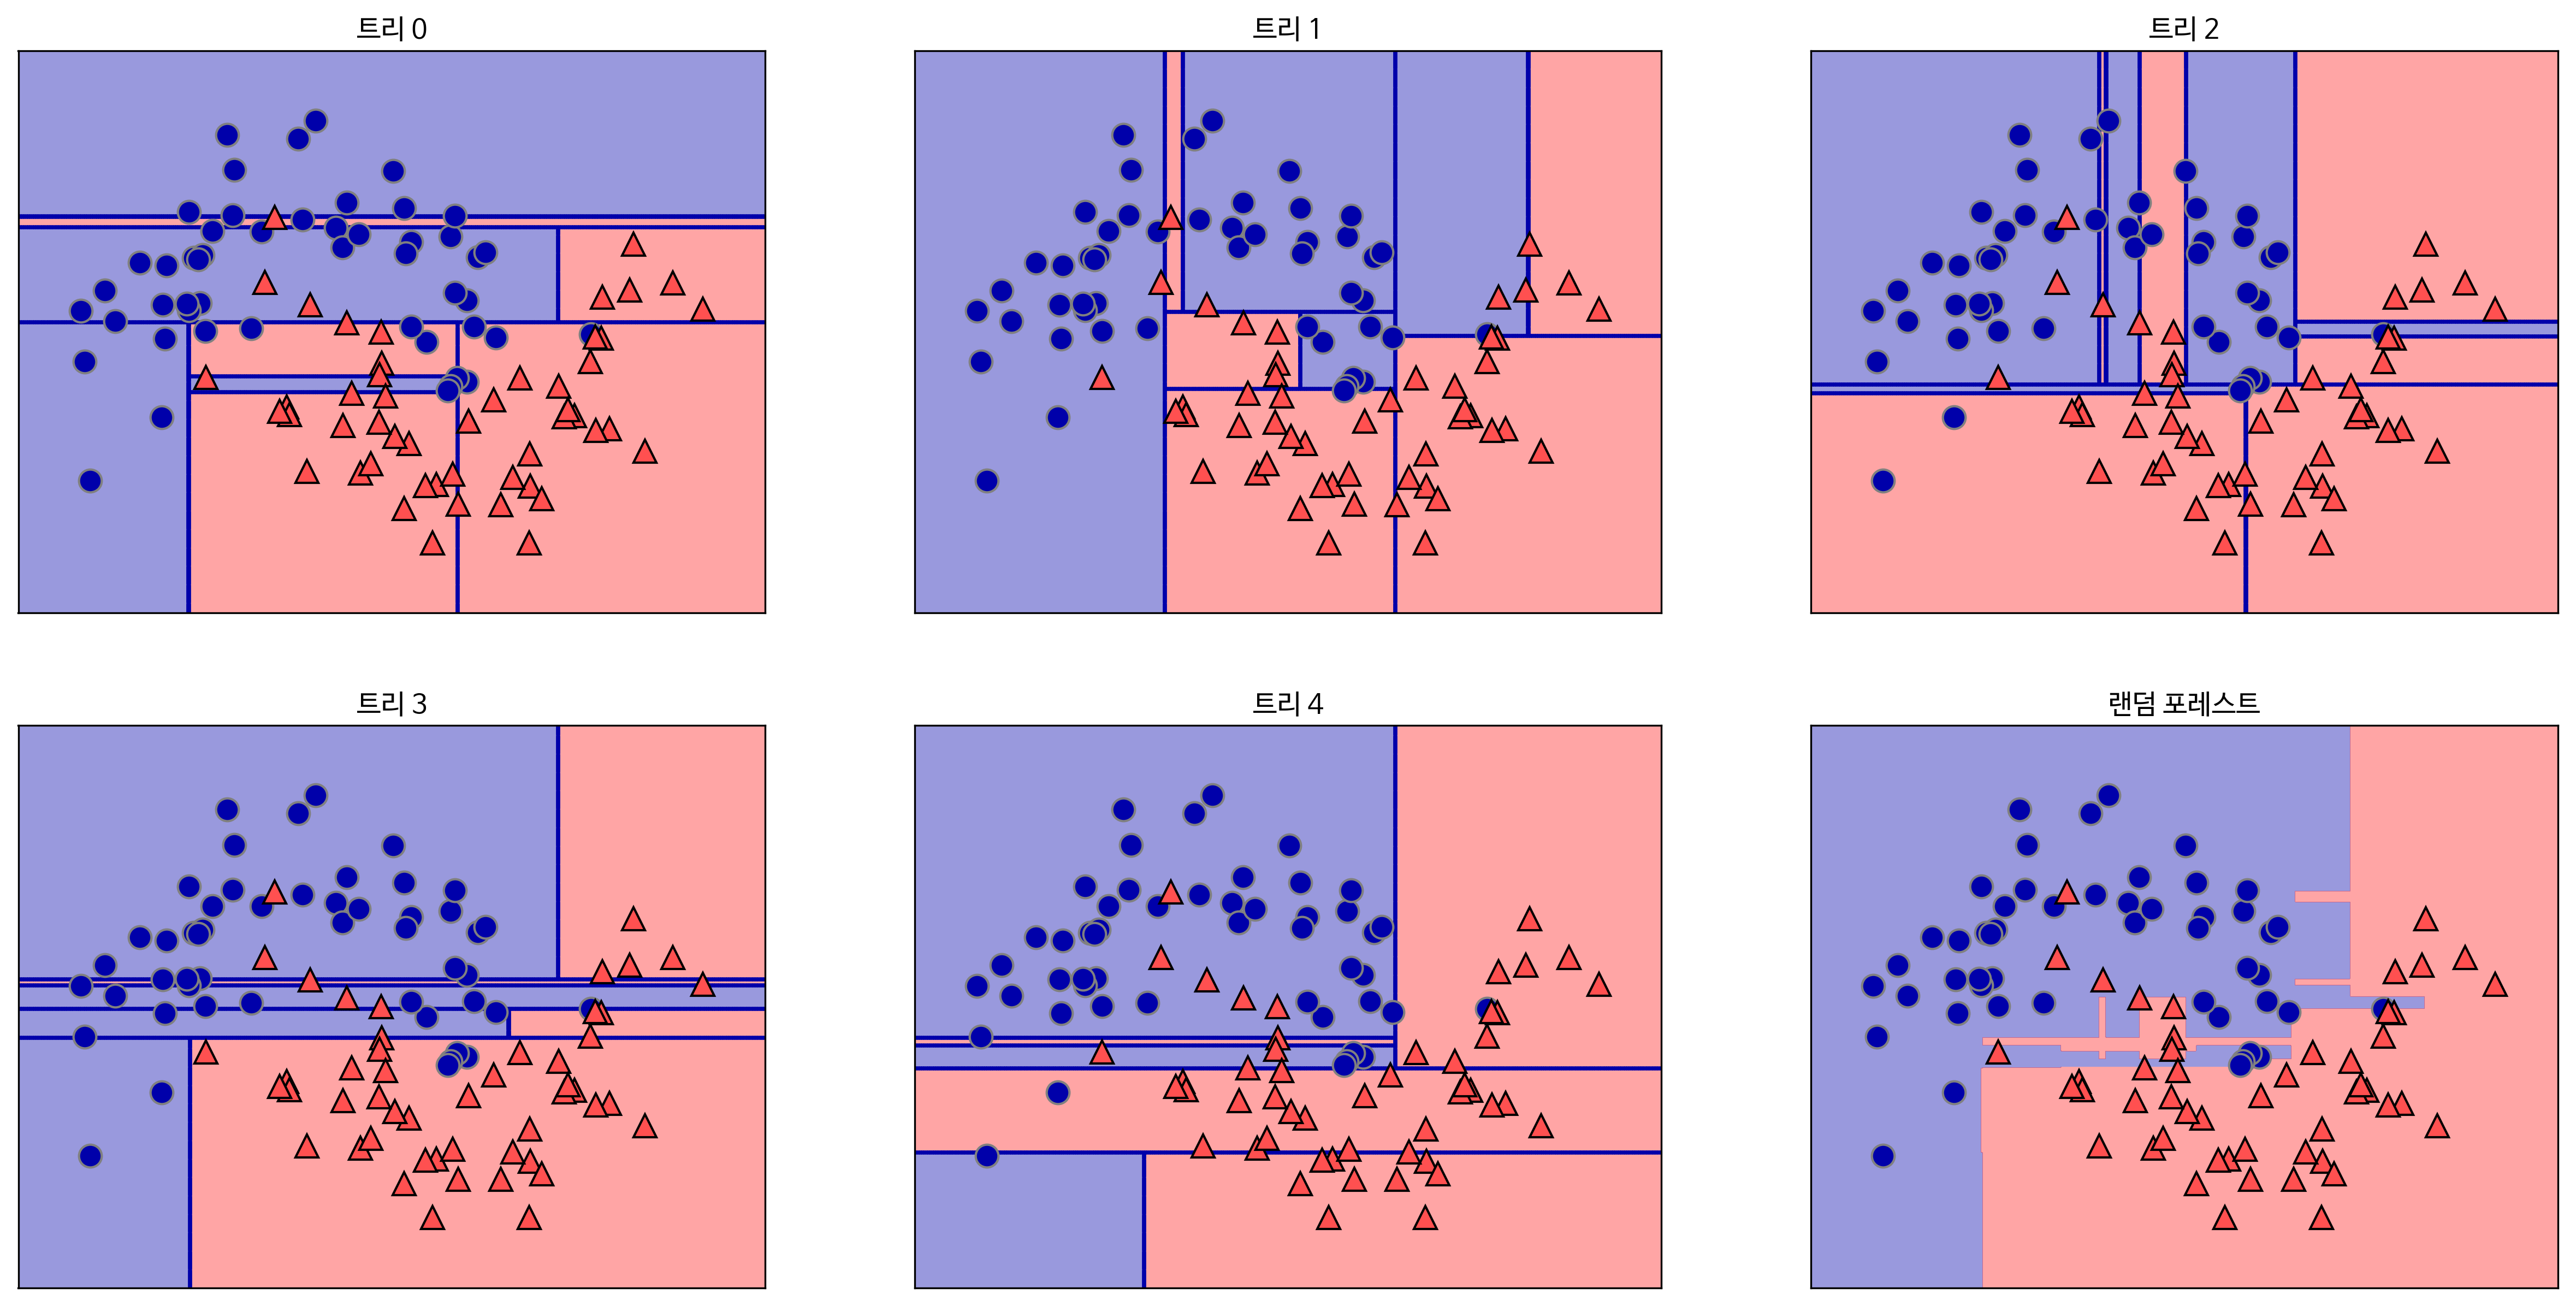

In [75]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

# 랜덤 포레스트는 기본 설정으로도 좋은 결과를 만들어줄 때가 많다.

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


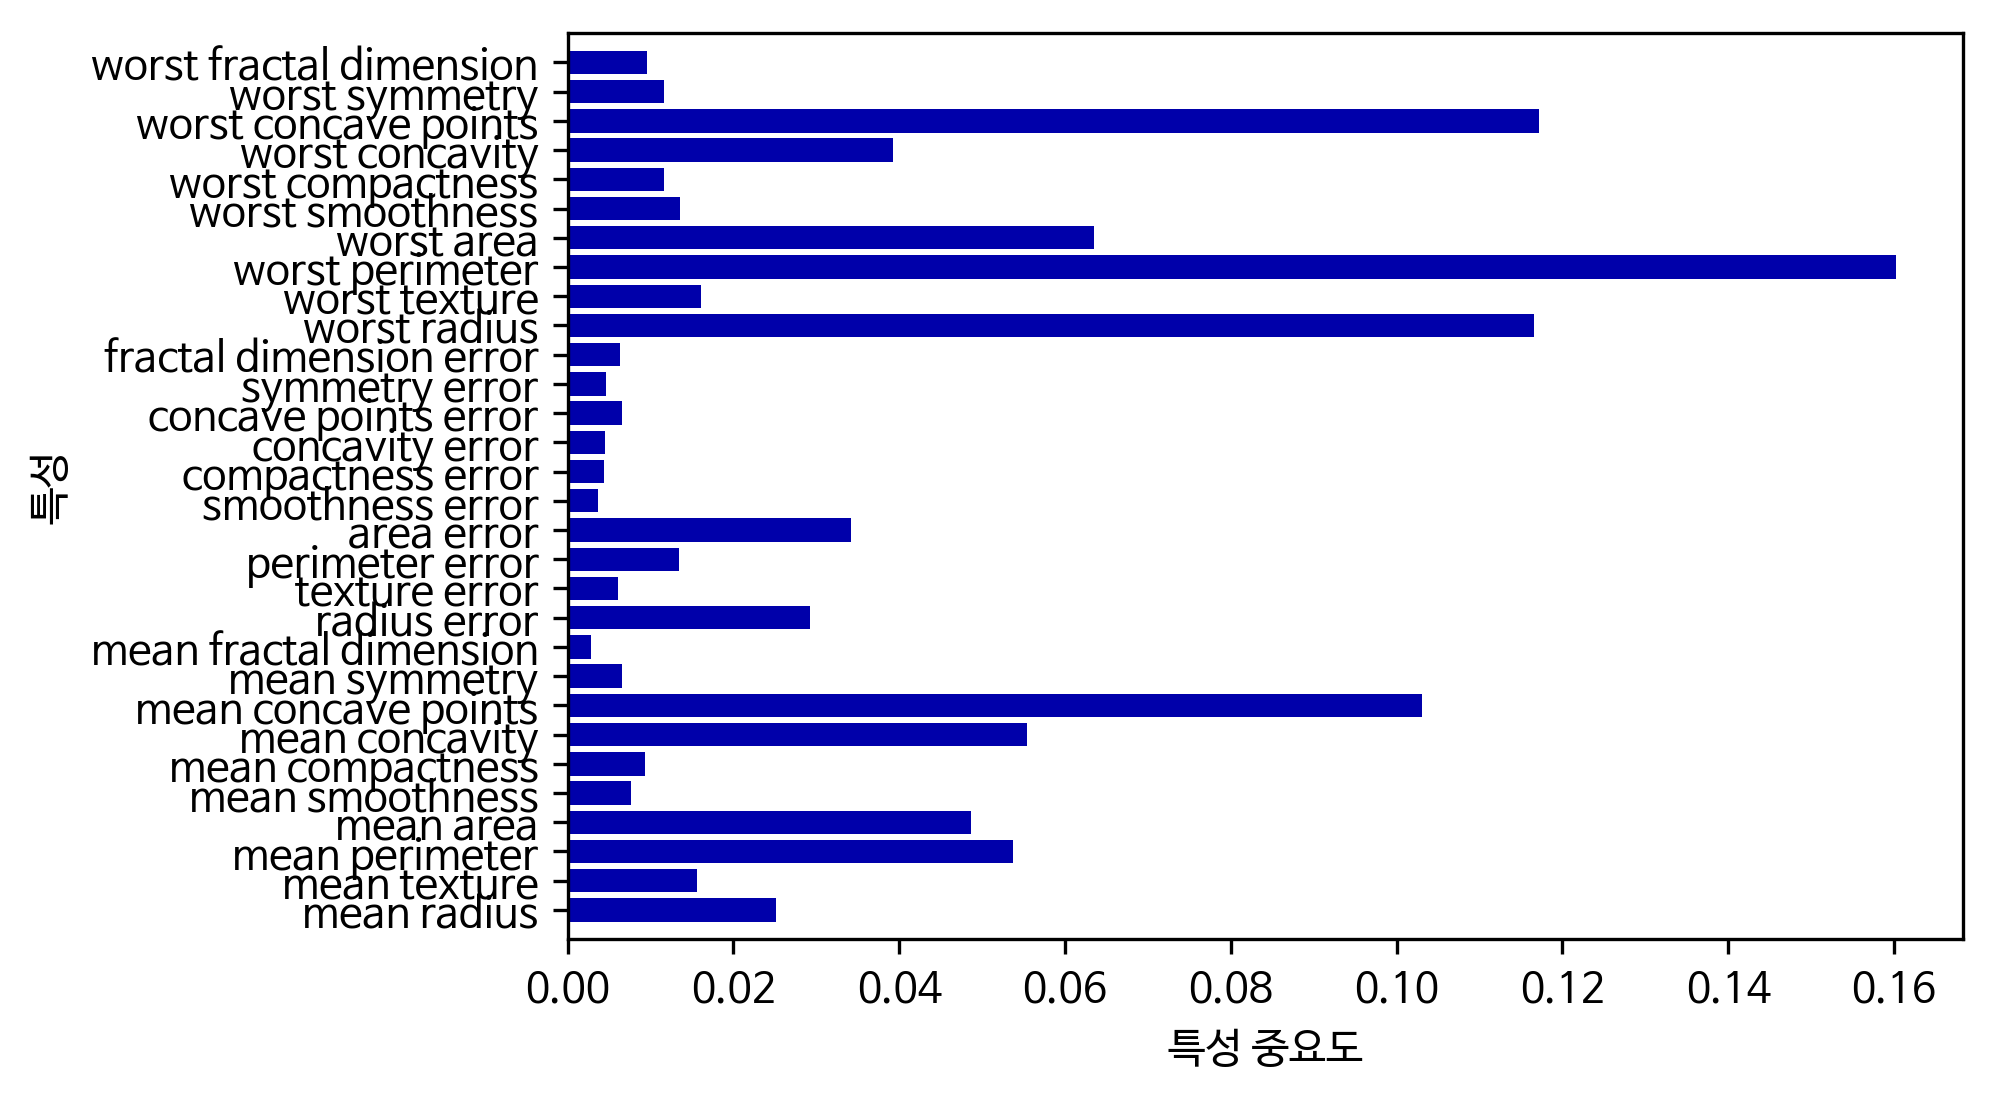

In [79]:
plot_feature_importances_cancer(forest)

## 장단점과 매개변수
### 회귀와 분류에 있어서 랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘.
### 성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며 데이터의 스케일을 맞출 필요도 없다.
### 기본적으로 단일 트리의 단점을 보완하고 장점은 그대로 가지고 있다.


## 그래디언트 부스팅 회귀 트리
### 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 방법
### 이름이 회귀지만 회귀와 분류 모두에 사용할 수 있다.
### 이진 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.
### 무작위성이 없다. 강력한 사전 가지치기가 사용된다.
### 보통 하나에서 다섯 정도의 깊지 않은 트리를 사용하므로 메모리를 적게 사용하고 예측도 빠르다.
### 그래디언트 부스팅의 근본 아이디어는 이런 얕은 트리 같은 간단한 모델(약한 학습기(weak learner))을 많이 연결하는 것
### 각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어서 트리가 많이 추가될수록 성능이 좋아짐.

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

# 훈련 세트의 정확도가 100%이므로 과대적합 --> 트리의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률을 낮춤

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


In [89]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [91]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


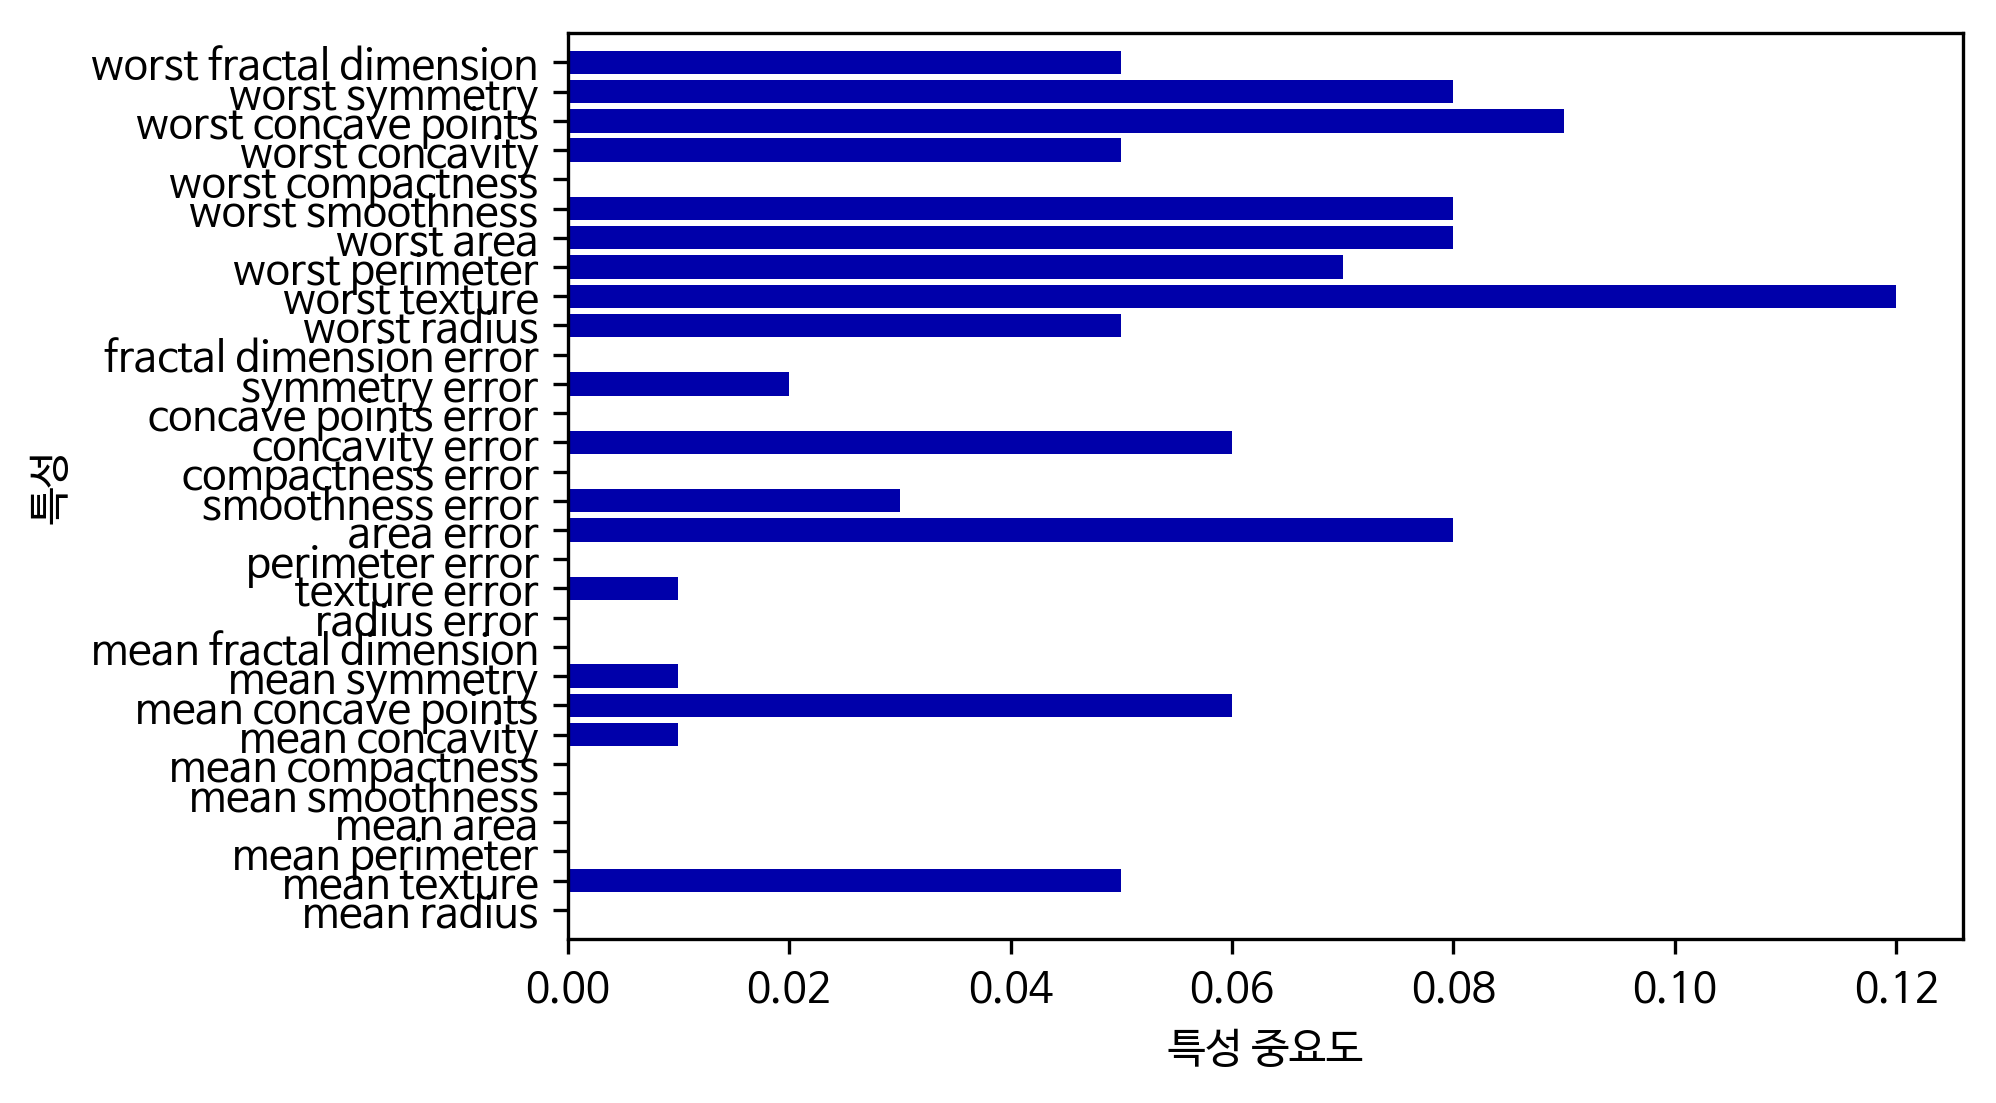

In [93]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

## 장단점과 매개변수
### 그래디언트 부스팅 결정 트리는 지도 학습에서 가장 강력하고 널리 사용하는 모델 중 하나
### 가장 큰 단점 : 매개변수를 잘 조정해야 한다, 훈련 시간이 길다
### 다른 트리 기반 모델처럼 특성의 스케일을 조정하지 않아도 된다
### 이진 특성이나 연속적인 특성에서도 잘 동작한다
### 희소한 고차원 데이터에는 잘 작동X

### 트리의 개수를 지정하는 n_estimators
### 이전 트리의 오차를 보정하는 정도를 조절하는 learning_rate

### learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해서 더 많은 트리를 추가해야 한다.
### n_estimators를 크게 하면 모델이 복잡해지고 과대적합될 가능성이 높아진다.

### 일반적인 관례는 가용한 시간과 메모리 한도에서 n_estimators를 맞추고 나서 적절한 learning_rate를 찾는 것

### 각 트리의 복잡도를 낮추는 max_depth를 매우 작게 설정하며 트리의 깊이가 5보다 깊어지지 않게 한다.